# Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013.Now each product has certain attributes that sets it apart from other products.Same is the case with store.

The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.

## Loading Packages

In [684]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_histogram

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

## Reading Data

In [686]:
data_train = pd.read_csv("Train.csv")
data_test = pd.read_csv("Test.csv")
data = pd.concat([data_train, data_test],ignore_index=True)

In [687]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Dimensions of Data

In [689]:
data_train.shape, data_test.shape, data.shape

((8523, 12), (5681, 11), (14204, 12))

The training dataset has 8523 instances and 12 features.

The test dataset has 5681 instances and 11 features since we have to predict Item_Outlet_Sales.

### Features of Data

In [692]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [693]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


Some of the features have object Dtypes else others have float64 and int64 Dtypes. Some of the features have missing values as well.

In [695]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

## Exploratory Data Analysis

In [697]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We will try to visualize the continuous variables using histograms and categorical variables using bar plots

### Univariate Analysis

#### Target Variable

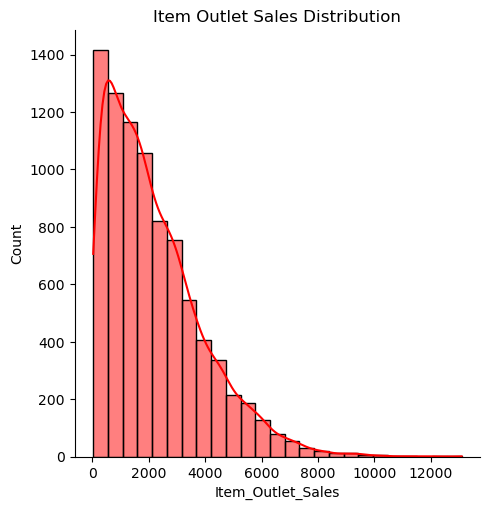

In [701]:
sns.displot(data_train["Item_Outlet_Sales"],color ='red',bins=25,
            kde = True )
plt.title("Item Outlet Sales Distribution")
plt.show()

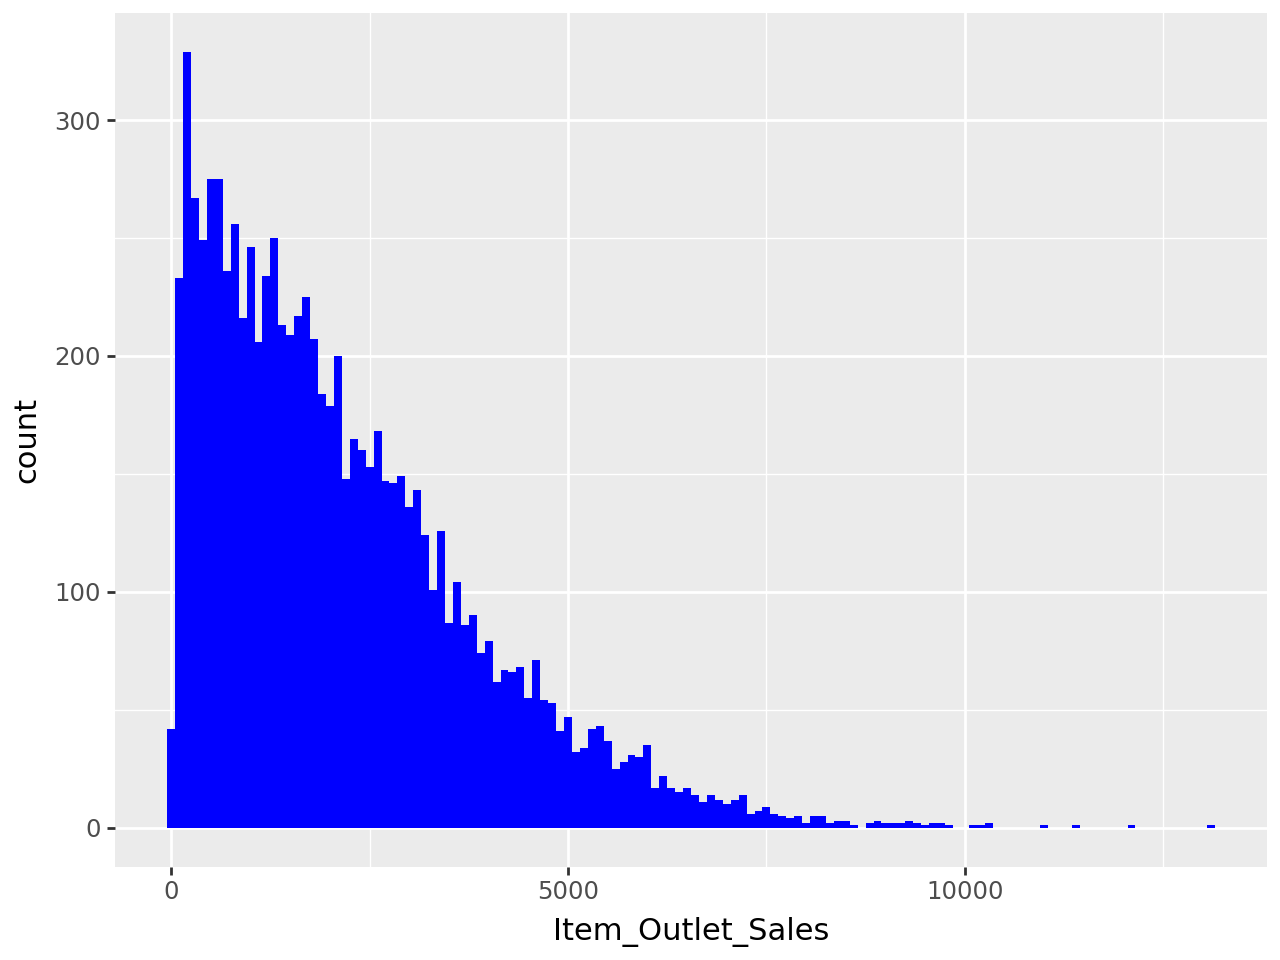

In [702]:
ggplot(data_train) + geom_histogram(aes("Item_Outlet_Sales"), binwidth=100, 
                                    fill = 'blue')

We can see that it is a right skewed variable and would need some data transformation to treat its skewness.

#### Independent Variables (numeric variables)

C:\Users\anuan\anaconda3\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_bin : Removed 2439 rows containing non-finite values.


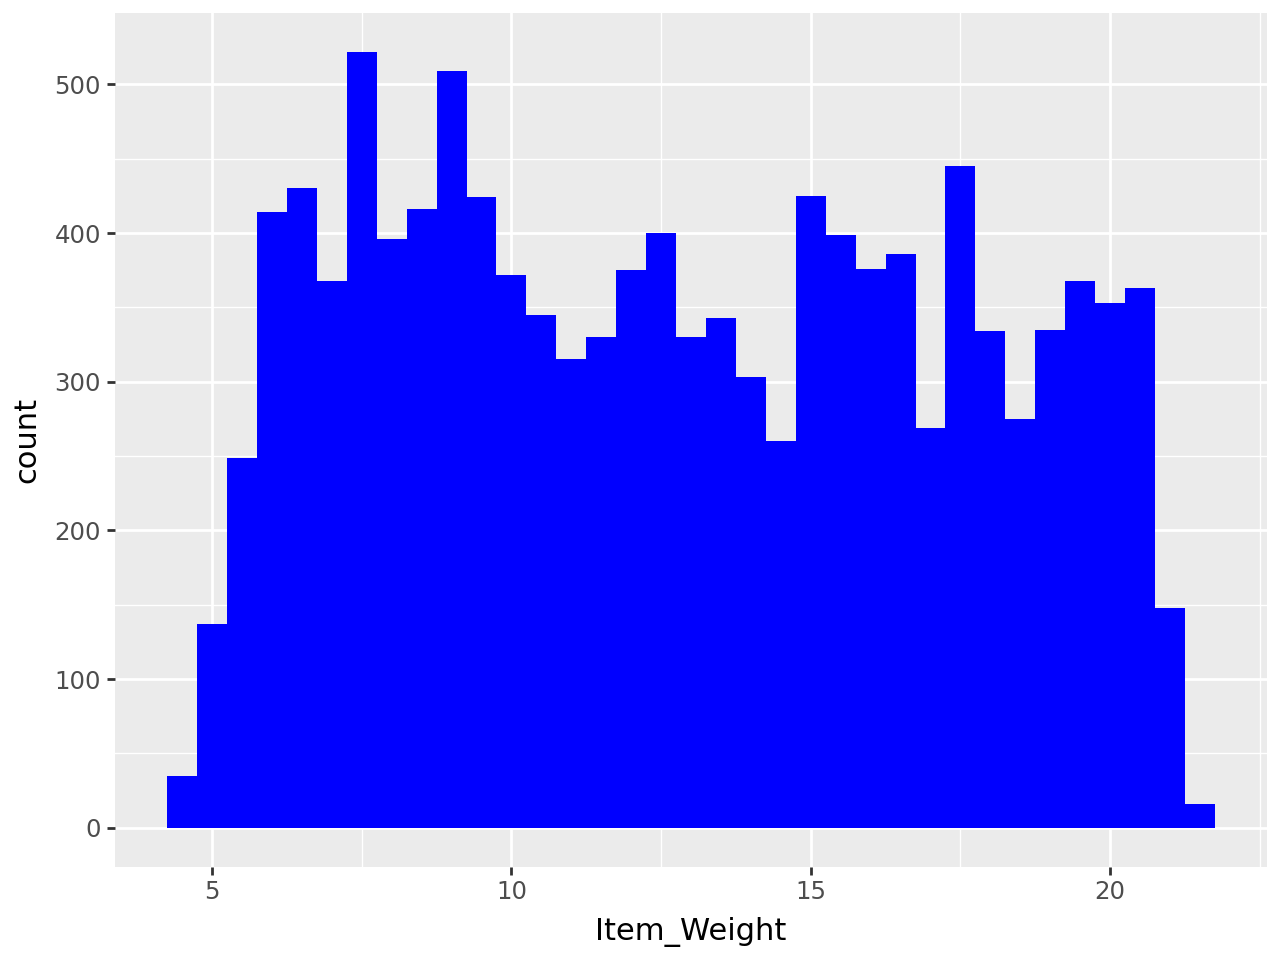

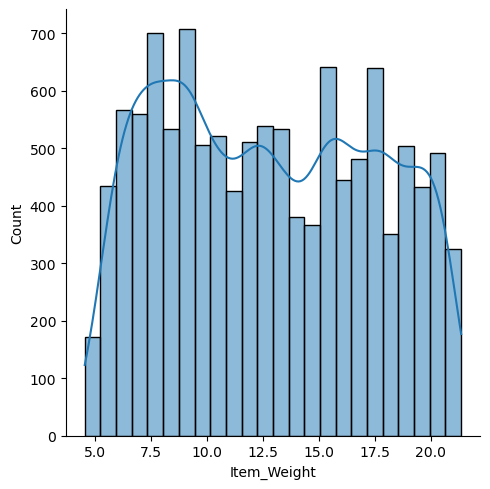

In [705]:
sns.displot(data["Item_Weight"], kde = True)
ggplot(data) + geom_histogram(aes("Item_Weight"), binwidth = 0.5,
                                    fill = "blue")

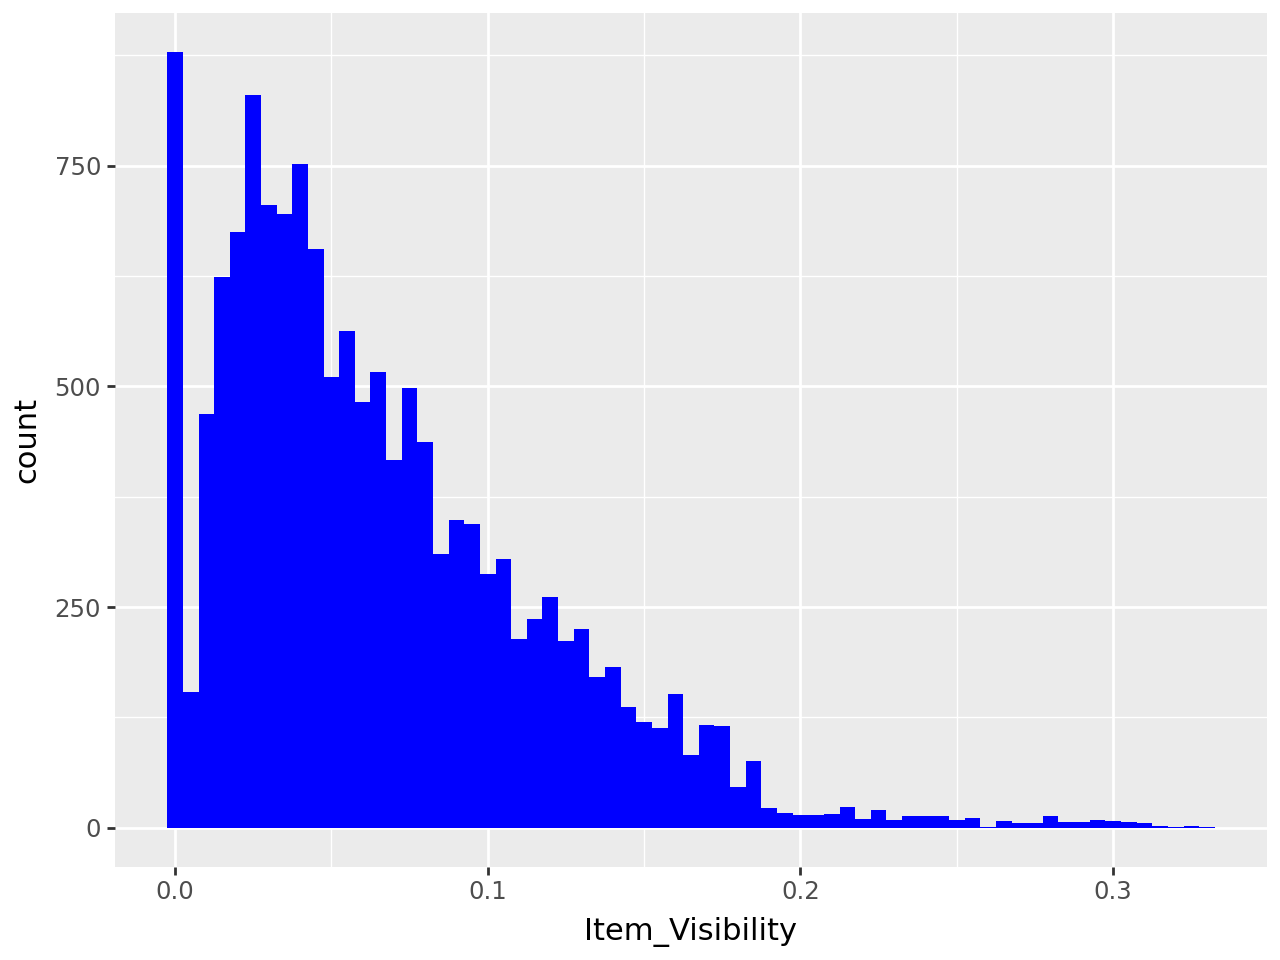

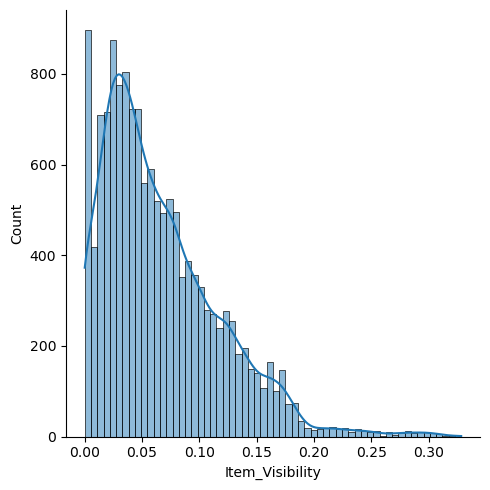

In [706]:
sns.displot(data["Item_Visibility"], kde = True)
ggplot(data) + geom_histogram(aes("Item_Visibility"), binwidth = 0.005,
                                    fill = "blue")

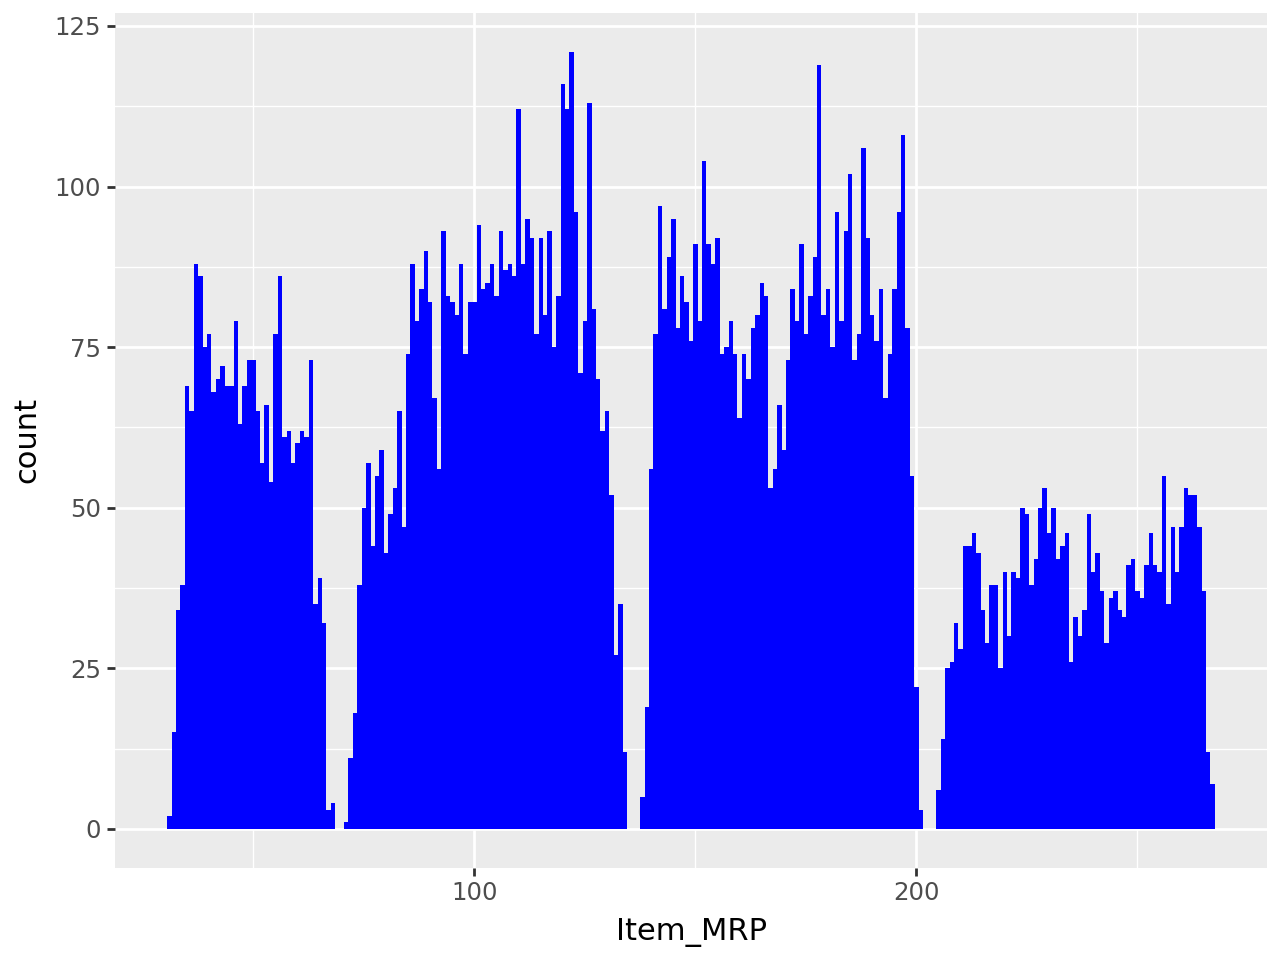

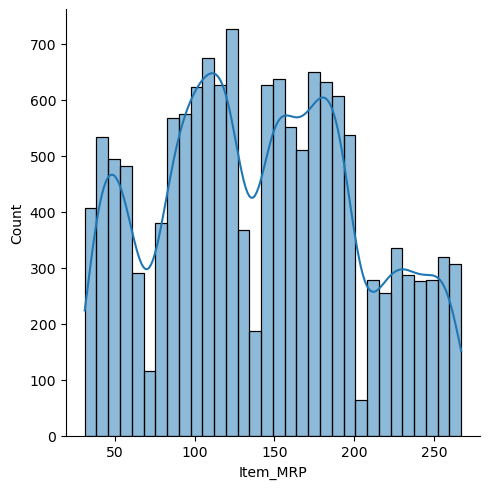

In [707]:
sns.displot(data["Item_MRP"], kde = True)
ggplot(data) + geom_histogram(aes("Item_MRP"), binwidth = 1,
                                    fill = "blue")

OBSERVATIONS : 

There seems to be no clear-cut pattern in Item_Weight.

Item_Visibility is right-skewed and should be transformed to curb its skewness.

We can clearly see 4 different distributions from Item_MRP.It is an interesting insight.

#### Independent Variables (Categorical Variables)

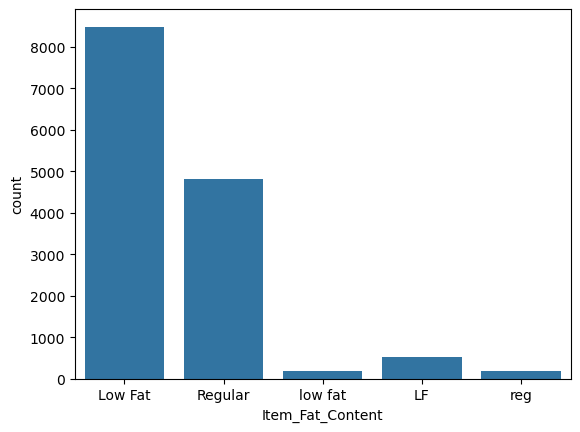

In [710]:
sns.countplot(x=data["Item_Fat_Content"])
plt.show()

In the above figure, category like 'low fat', 'LF' both represent 'Low Fat' category and can be combined into one. Similarly 'reg' and 'regular' can be combined into one category.

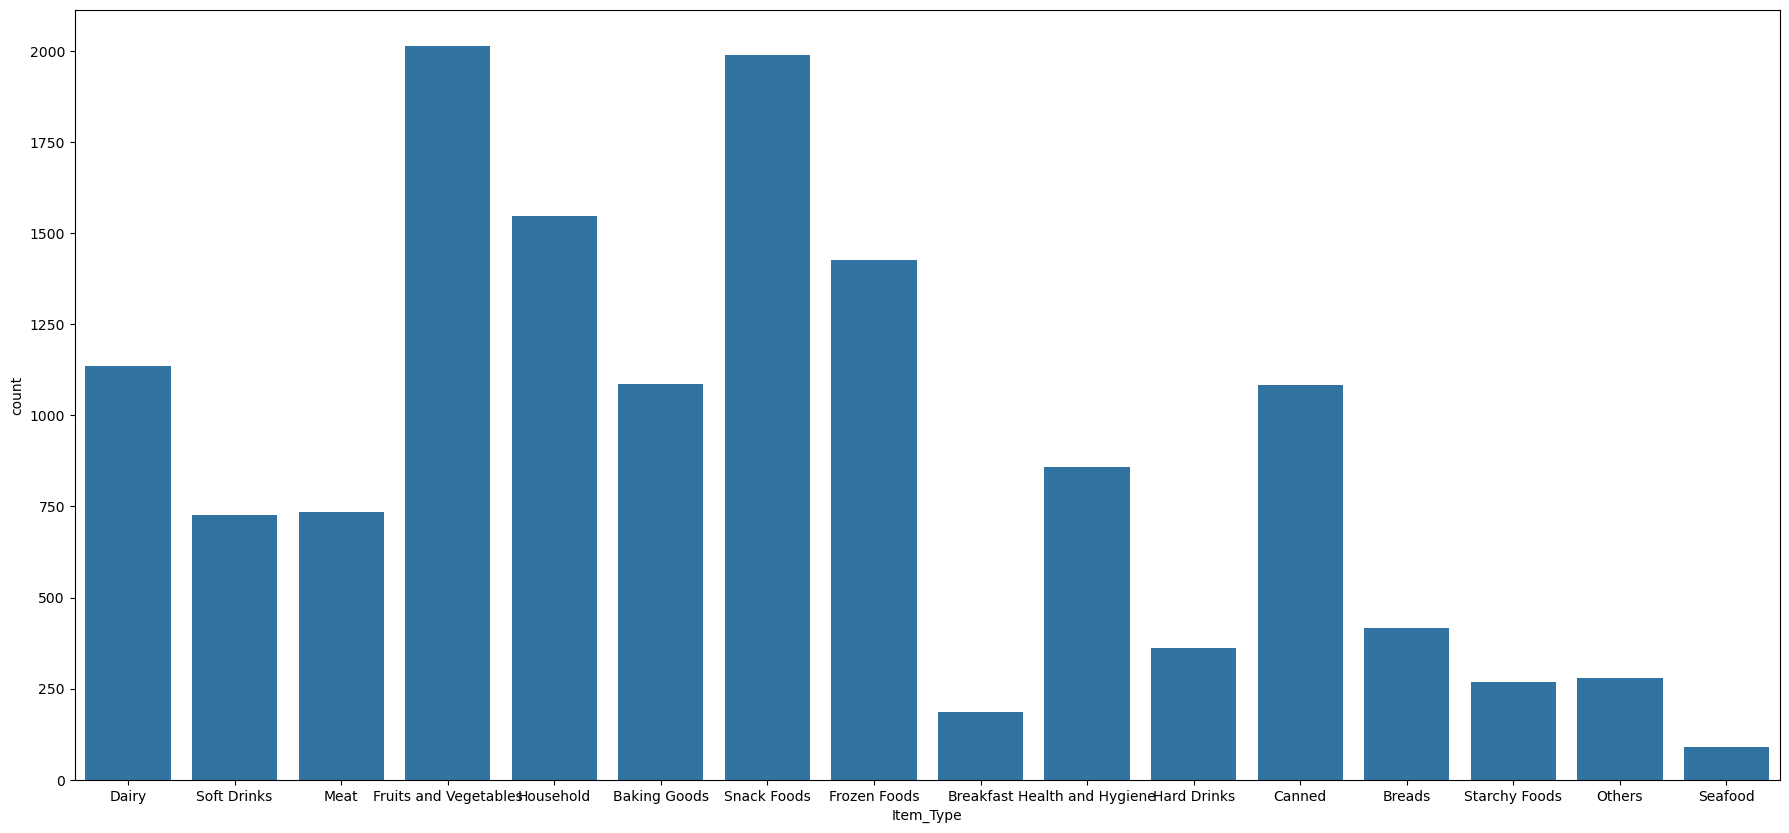

In [712]:
plt.figure(figsize=(22,10))
sns.countplot(x=data["Item_Type"])
plt.show()

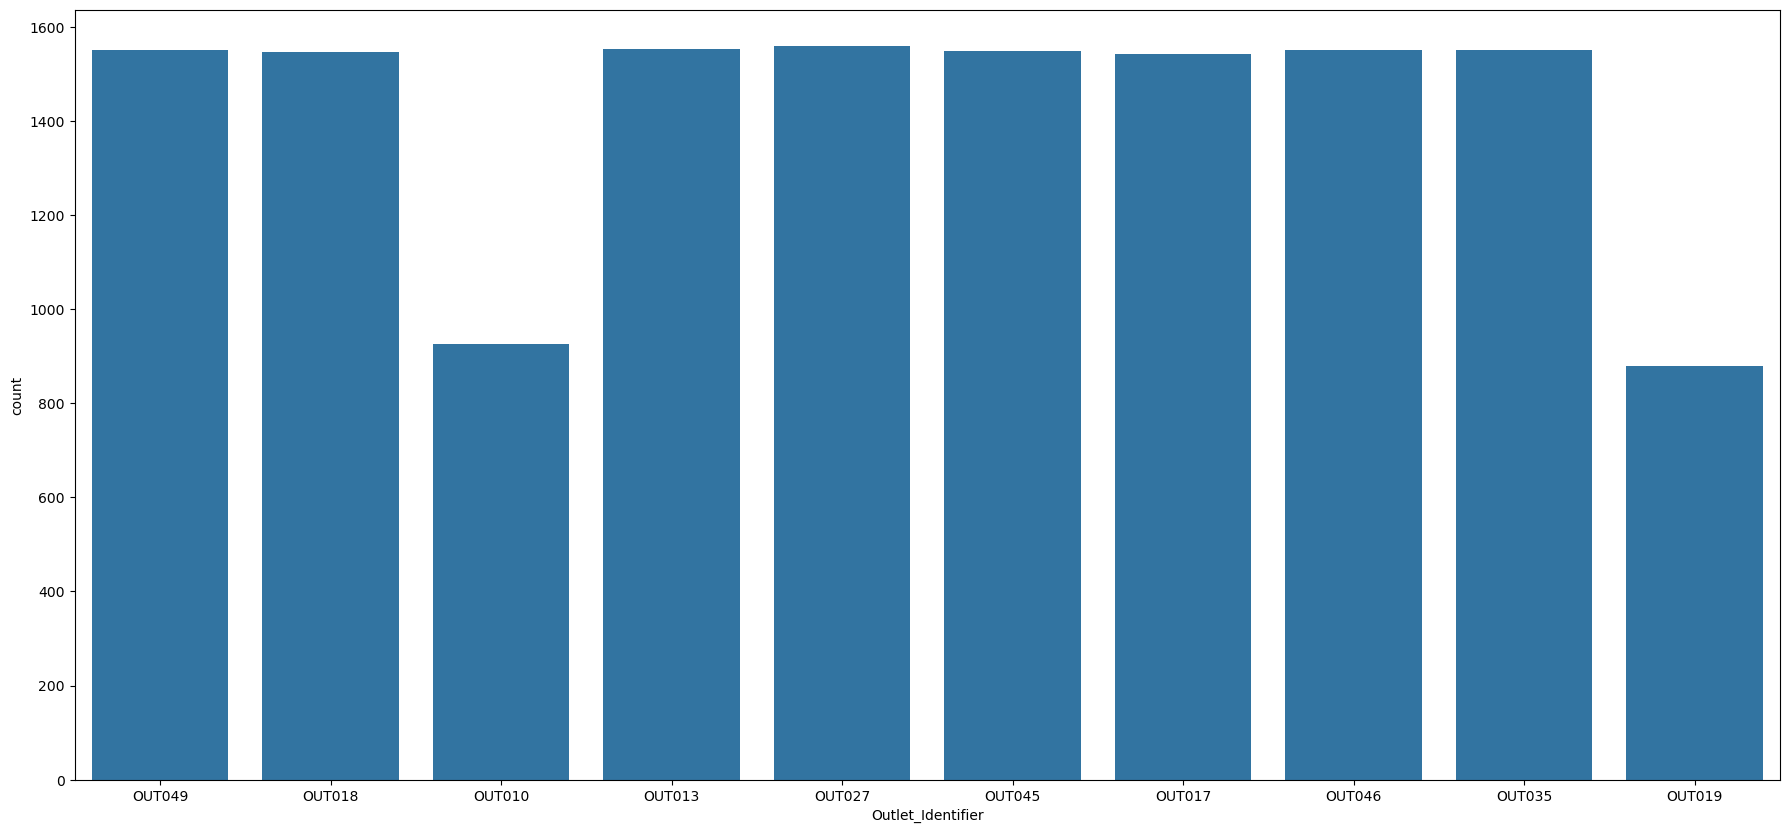

In [713]:
plt.figure(figsize=(22,10))
sns.countplot(x=data["Outlet_Identifier"])
plt.show()

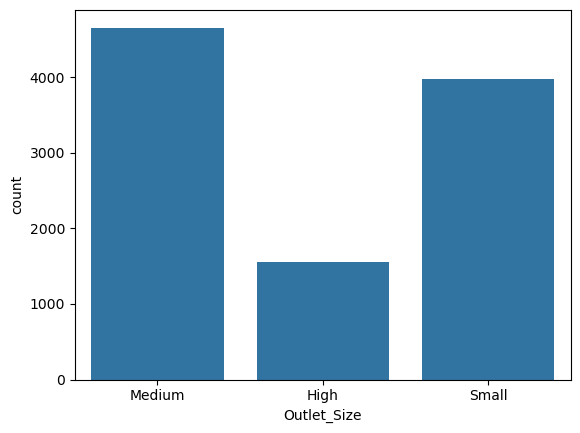

In [714]:
sns.countplot(x=data["Outlet_Size"])
plt.show()

<Axes: ylabel='count'>

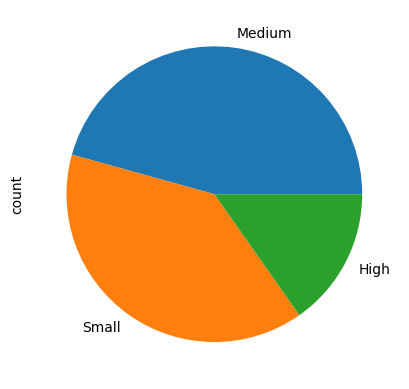

In [715]:
data["Outlet_Size"].value_counts().plot.pie()

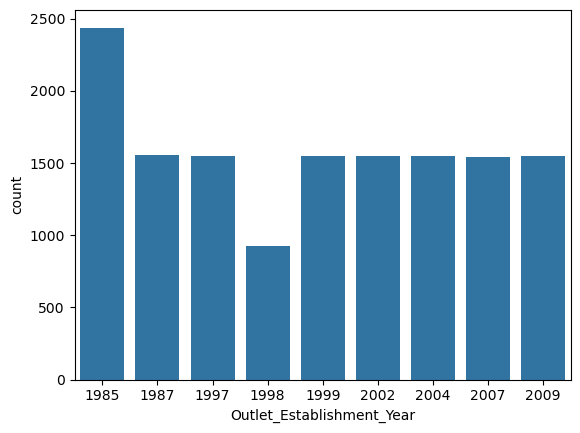

In [716]:
sns.countplot(x=data["Outlet_Establishment_Year"])
plt.show()

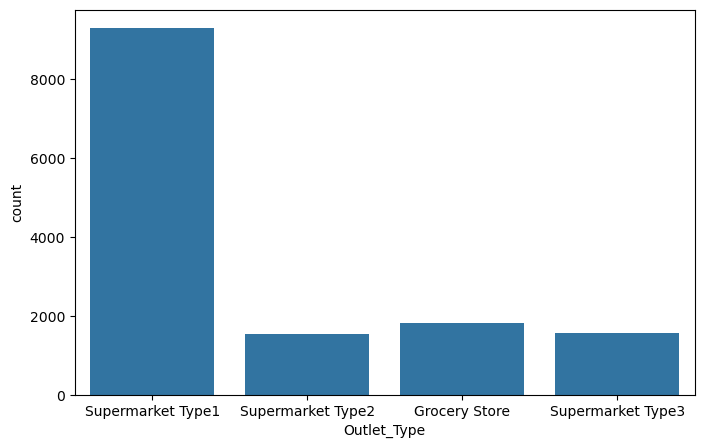

In [717]:
plt.figure(figsize=(8,5))
sns.countplot(x=data["Outlet_Type"])
plt.show()

We can observe a lesser number of observations in the data for the outlets established in the year 1998 as compared to other years.

Supermarket Type 1 seems to be the most popular category of Outlet_Type

### Bivariate Analysis

We'll explore the independent variable with respect to the target variable.
The objective is to discover hidden relationships between the independent variable and the target variable and use those findings in missing data imputation and feature engineering.

We'll make use of scatter plots for the continuous or numeric variables and violin plots for the categorical variables.

#### Target Variable VS Independent Numeric Variables

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

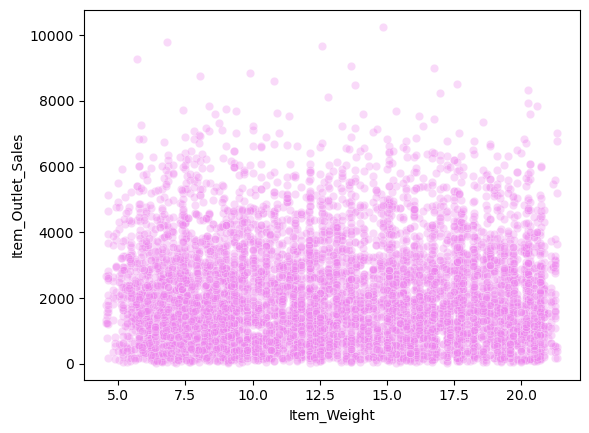

In [722]:
#Item_Weight VS Item_Outlet_Sales
sns.scatterplot(data = data_train, x="Item_Weight", y = "Item_Outlet_Sales", 
                color = "violet", alpha = 0.3)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

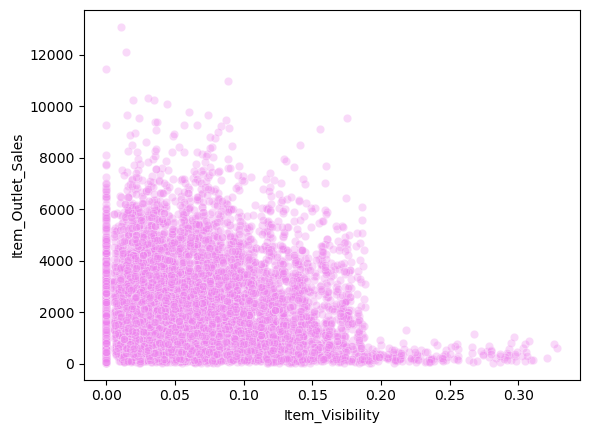

In [723]:
#Item_Visibility VS Item_Outlet_Sales
sns.scatterplot(data = data_train, x="Item_Visibility", y = "Item_Outlet_Sales", 
                color = "violet", alpha = 0.3)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

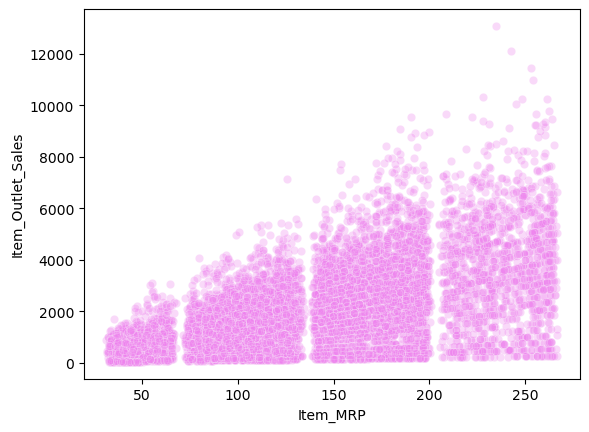

In [724]:
#Item_MRP VS Item_Outlet_Sales
sns.scatterplot(data = data_train, x="Item_MRP", y = "Item_Outlet_Sales", 
                color = "violet", alpha = 0.3)

#### Observations :

Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.

In Item_Visibility VS Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero.

In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.


#### Target Variable VS Independent Categorical Variables

We'll use violin plots as they show the full distribution of the data. The width of a violin plot at a particular level indicates the concentration or density of data at that level. The height of a violin tells us about the range of the target variable values.

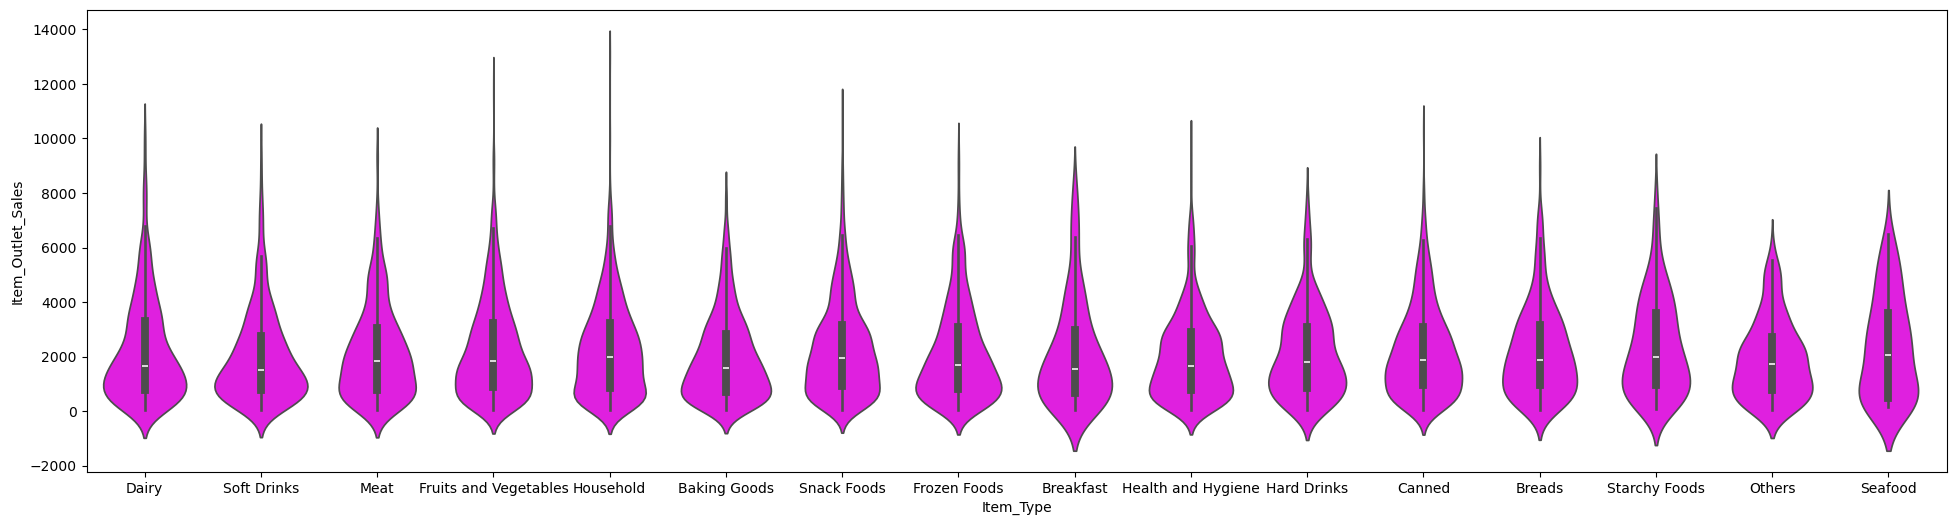

In [728]:
#Item_Type VS Item_Outlet_Sales
plt.figure(figsize=(24,6))
sns.violinplot(data = data_train, x="Item_Type", y = "Item_Outlet_Sales", 
                color = "magenta")
plt.show()

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

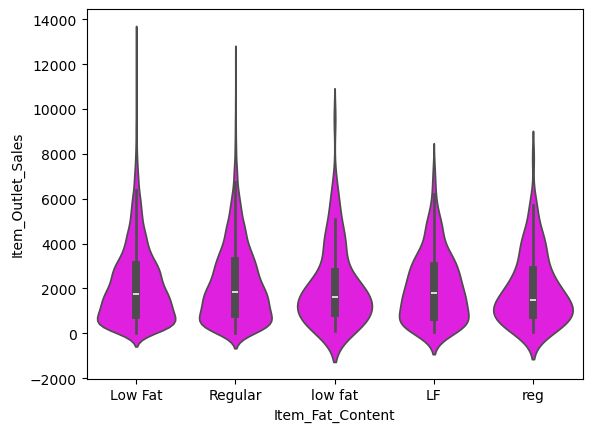

In [729]:
#Item_Fat_Content VS Item_Outlet_Sales
sns.violinplot(data = data_train, x="Item_Fat_Content", y = "Item_Outlet_Sales", 
                color = "magenta")

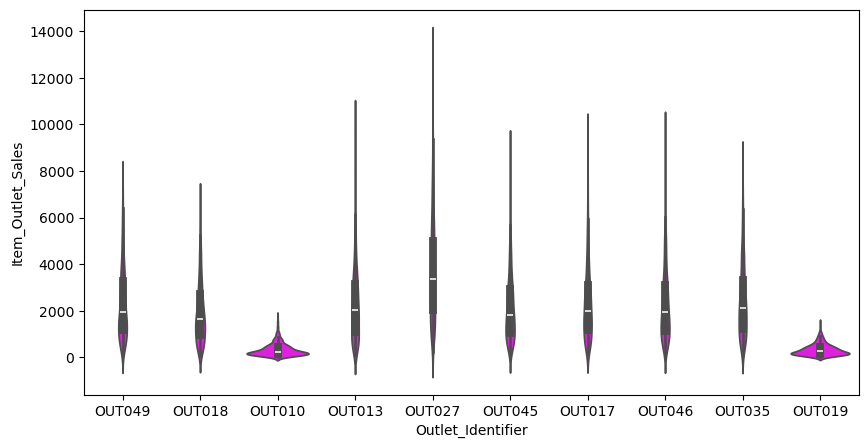

In [730]:
#Outlet_Identifier VS Item_Outlet_Sales
plt.figure(figsize=(10,5))
sns.violinplot(data = data_train, x="Outlet_Identifier", y = "Item_Outlet_Sales", 
                color = "magenta")
plt.show()

#### Observations

Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.

The distribution of OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identfier.

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

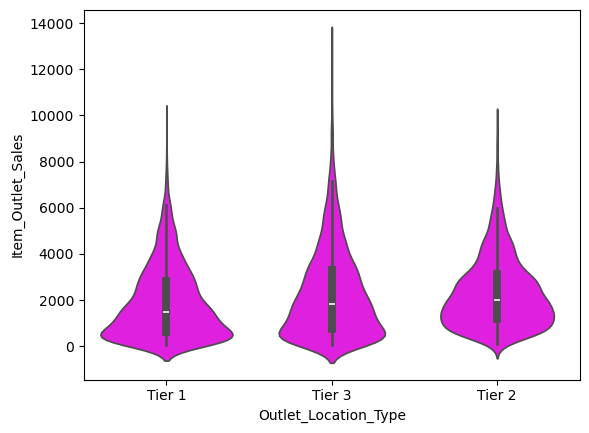

In [732]:
#Outlet_Location_Type VS Item_Outlet_Sales
sns.violinplot(data = data_train, x="Outlet_Location_Type", y = "Item_Outlet_Sales", 
                color = "magenta")

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

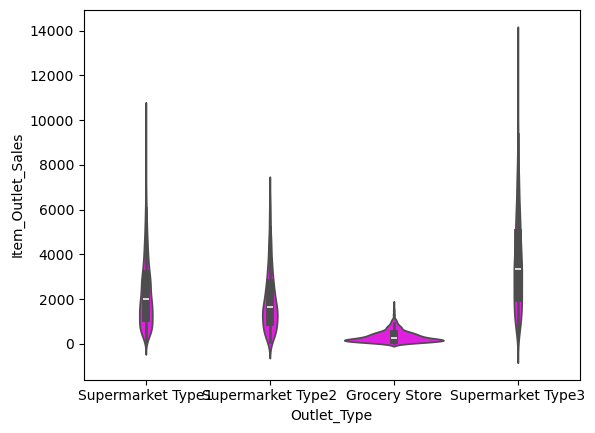

In [733]:
#Outlet_Type VS Item_Outlet_Sales
sns.violinplot(data = data_train, x="Outlet_Type", y = "Item_Outlet_Sales", 
                color = "magenta")

#### Observations

Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.

In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.

## Missing Values

In [736]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

We have missing values in Item_Weight and Outlet_Size

In [738]:
df = data.copy()

In [739]:
#Imputing Item_Weight with mean weight based on the Item_Identifier variable
df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)

C:\Users\anuan\AppData\Local\Temp\ipykernel_8776\1576373168.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [740]:
df['Item_Weight'].isnull().sum()

0

In [741]:
#Outlet_Size
df['Outlet_Size'].fillna(df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0]), inplace=True)

C:\Users\anuan\AppData\Local\Temp\ipykernel_8776\3252368592.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [742]:
df['Outlet_Size'].isnull().sum()

0

## Feature Engineering

In [744]:
#Replacing 0's in Item_Visibility variable

zero_index = df[df['Item_Visibility'] == 0].index

for i in zero_index:
    item = df['Item_Identifier'][i]
    mean_visibility = df[data['Item_Identifier'] == item]['Item_Visibility'].mean()
    df.at[i, 'Item_Visibility'] = mean_visibility

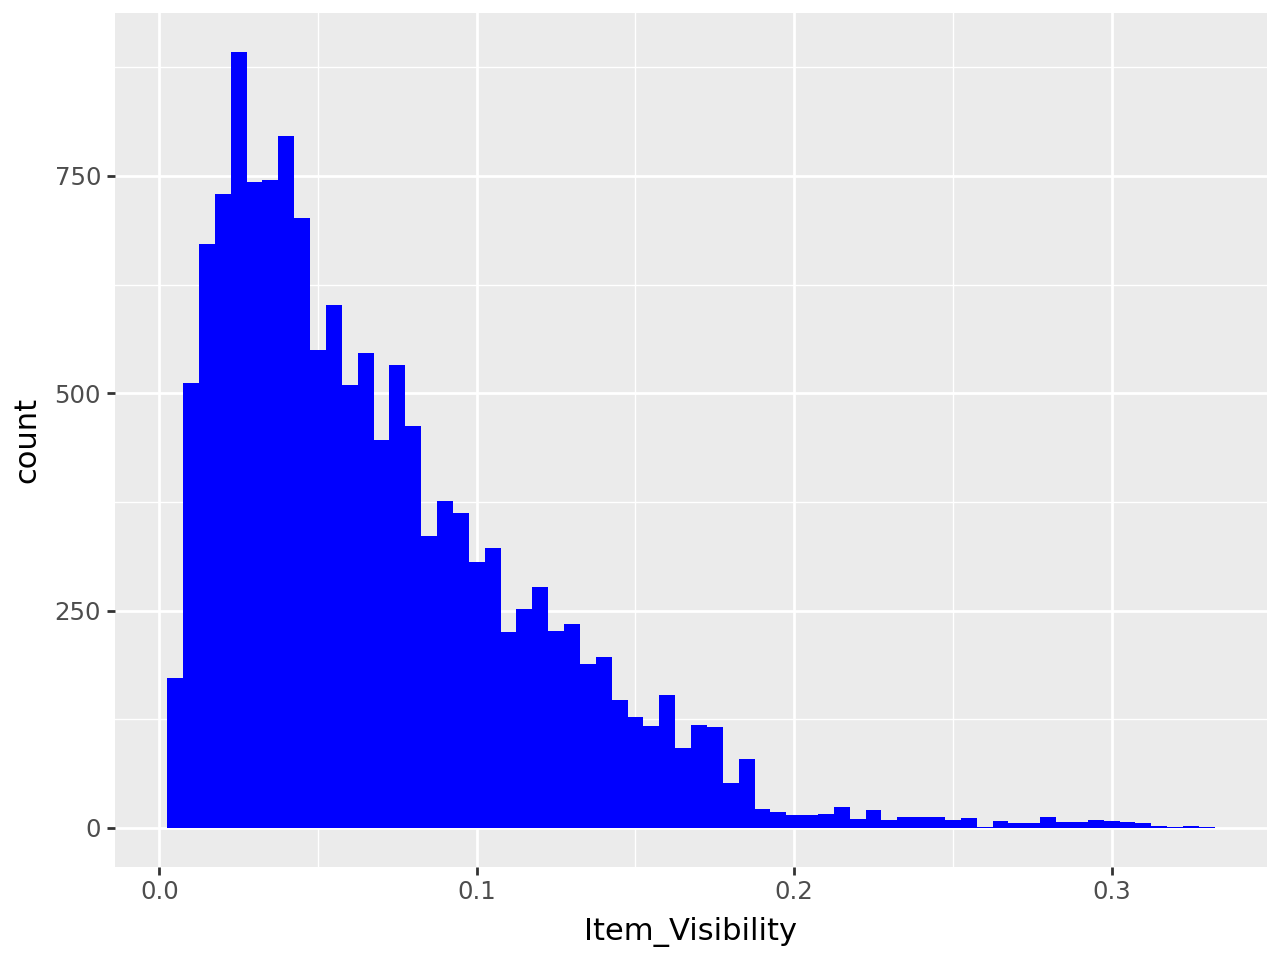

In [745]:
ggplot(df) + geom_histogram(aes("Item_Visibility"), binwidth = 0.005,
                                    fill = "blue")

In [746]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

We will create the following new features:

Item_Type_new : Broader categories for the variable Item_Type

Item_Category : Categorical variable derived from Item_Identifier

Outlet_Years : Years of operation for outlets

price_per_unit_wt : Item_MRP/Item_Weight

Item_MRP_clusters : Binned feature for Item_MRP

Item_Type variable can be classified into "perishable" and "non_perishable" and make it into a new feature.

In [749]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [750]:
perishable = ["Dairy", "Meat", "Fruits and Vegetables", "Breakfast", "Breads", "Seafood"]

non_perishable = ["Soft Drinks","Household", "Baking Goods", "Frozen Foods", "Health and Hygiene",
                  "Hard Drinks", "Canned"]

In [751]:
df['Item_Type_new'] = df['Item_Type'].apply(lambda x: 'perishable' if x in perishable
                                           else 'non_perishable' if x in non_perishable
                                           else 'not_sure')

In [752]:
df['Item_Type_new'].value_counts()

Item_Type_new
non_perishable    7090
perishable        4576
not_sure          2538
Name: count, dtype: int64

Comparing Item_Type with the first 2 charaters of Item_Identifier, i.e., 'DR', 'FR' and 'NC'. These identifiers most probably stand for drinks, food and non-consumerable.

In [754]:
table = df.groupby([df['Item_Type'], df['Item_Identifier'].str[:2]]).size().unstack(fill_value=0)
print(table)

Item_Identifier         DR    FD    NC
Item_Type                             
Baking Goods             0  1086     0
Breads                   0   416     0
Breakfast                0   186     0
Canned                   0  1084     0
Dairy                  229   907     0
Frozen Foods             0  1426     0
Fruits and Vegetables    0  2013     0
Hard Drinks            362     0     0
Health and Hygiene       0     0   858
Household                0     0  1548
Meat                     0   736     0
Others                   0     0   280
Seafood                  0    89     0
Snack Foods              0  1989     0
Soft Drinks            726     0     0
Starchy Foods            0   269     0


Based on this we can create a new feature "Item_category"

In [756]:
df['Item_category'] = df['Item_Identifier'].apply(lambda x: x[:2])

We will change the values of Item_Fat_Content wherever Item_Category is 'NC' because non-consumerable items cannot have any fat content.

In [758]:
df.loc[df['Item_category'] == 'NC', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: count, dtype: int64

In [759]:
#Outlet_Years (years of operation)
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')


In [760]:
#price_per_unit_wt (price per unit length)
df['price_per_unit_wt'] = df['Item_MRP'] / df['Item_Weight']

Earlier in the Item_MRP VS Item_Outlet_Sales plot, we saw Item_MRP was spread across in 4 chunks.
We will assign a label to each of these chunks and use this label as a new variable

In [762]:
#Item_MRP_clusters
conditions = [
    (df['Item_MRP'] < 69),
    (df['Item_MRP'] >= 69) & (df['Item_MRP'] < 136),
    (df['Item_MRP'] >= 136) & (df['Item_MRP'] < 203),
]
values = ['1st', '2nd', '3rd']

df['Item_MRP_clusters'] = np.select(conditions, values, default='4th')

In [763]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Item_category,Outlet_Years,price_per_unit_wt,Item_MRP_clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,FD,14,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable,DR,4,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,FD,14,8.092457,3rd
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,perishable,FD,15,9.484115,3rd
4,NCD19,8.93,Non-Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable,NC,26,6.031512,1st


In [764]:
df.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content               object
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year    category
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
Item_Type_new                  object
Item_category                  object
Outlet_Years                    int64
price_per_unit_wt             float64
Item_MRP_clusters              object
dtype: object

## Encoding Categorical Variables

##### Label Encoding for Outlet_Size and Outlet_Location_Type

In [767]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [768]:
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])

In [769]:
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])

##### One Hot Encoding

In [771]:
columns_to_drop = ["Item_Identifier", "Outlet_Establishment_Year", "Item_Type"]
df = df.drop(columns=[col for col in columns_to_drop if col in df], axis=1)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding only on categorical column
df_enc = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype='uint8')


In [772]:
df_enc.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Size                        int32
Outlet_Location_Type               int32
Item_Outlet_Sales                float64
Outlet_Years                       int64
price_per_unit_wt                float64
Item_Fat_Content_Non-Edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifier_OUT017           uint8
Outlet_Identifier_OUT018           uint8
Outlet_Identifier_OUT019           uint8
Outlet_Identifier_OUT027           uint8
Outlet_Identifier_OUT035           uint8
Outlet_Identifier_OUT045           uint8
Outlet_Identifier_OUT046           uint8
Outlet_Identifier_OUT049           uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Type_new_not_sure             uint8
Item_Type_new_perishable           uint8
Item_category_FD

## Data Preprocessing

In [774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           14204 non-null  float64
 1   Item_Fat_Content      14204 non-null  object 
 2   Item_Visibility       14204 non-null  float64
 3   Item_MRP              14204 non-null  float64
 4   Outlet_Identifier     14204 non-null  object 
 5   Outlet_Size           14204 non-null  int32  
 6   Outlet_Location_Type  14204 non-null  int32  
 7   Outlet_Type           14204 non-null  object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Item_Type_new         14204 non-null  object 
 10  Item_category         14204 non-null  object 
 11  Outlet_Years          14204 non-null  int64  
 12  price_per_unit_wt     14204 non-null  float64
 13  Item_MRP_clusters     14204 non-null  object 
dtypes: float64(5), int32(2), int64(1), object(6)
memory usage: 1.4+ MB


In [775]:
df.shape

(14204, 14)

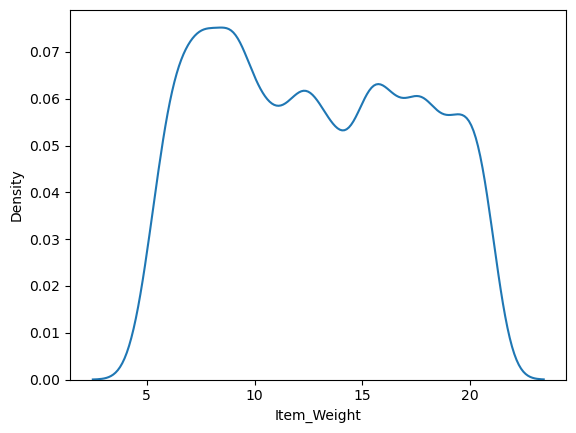

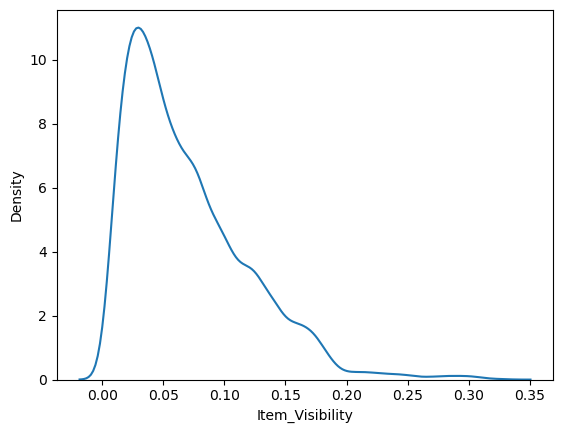

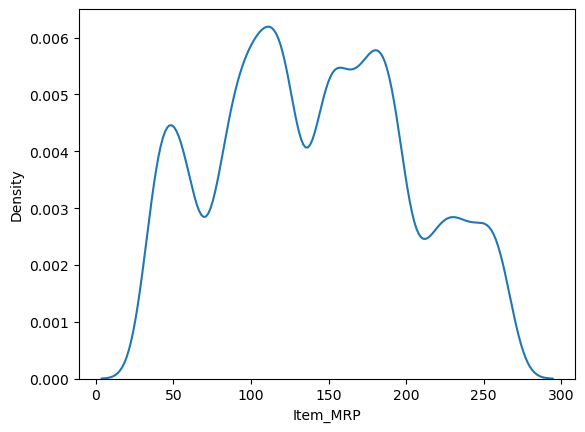

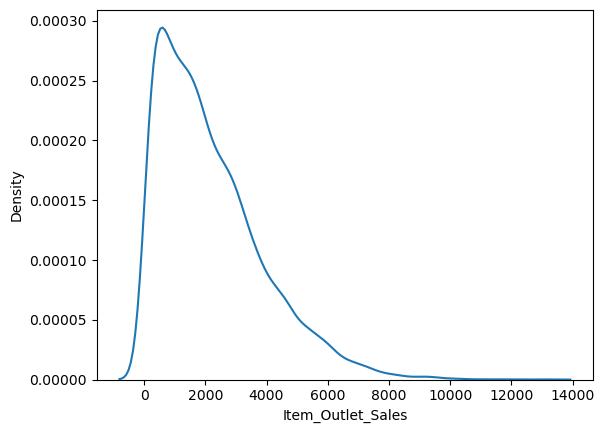

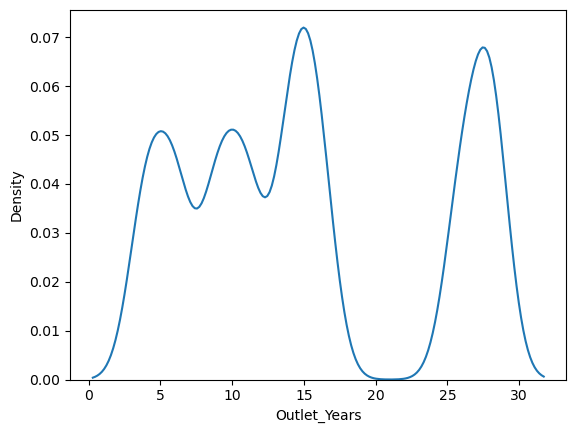

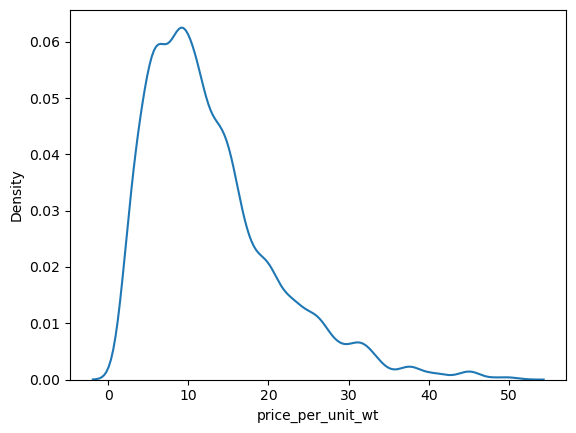

In [776]:
for i in df_enc.columns:
    if df_enc[i].dtypes=='float64':
        sns.kdeplot(df_enc[i])
        plt.xlabel(i)
        plt.show()
    elif df_enc[i].dtypes=='int64':
        sns.kdeplot(df_enc[i])
        plt.xlabel(i)
        plt.show()

Removing Skewness

In [778]:
df_scaled = df_enc.copy()
df_scaled['Item_Visibility'] = np.log(df_enc['Item_Visibility'] + 1)
df_scaled['price_per_unit_wt'] = np.log(df_enc['price_per_unit_wt'] + 1)

#added 1 to avoid errors when taking the logarithm of zero or negative values

In [779]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named df_scaled
num_vars = df_scaled.select_dtypes(include=['number']).columns
num_vars_names = list(num_vars)
df_numeric = df_scaled[num_vars_names].drop("Item_Outlet_Sales", axis=1)

# Standardize (center and scale) the numeric features
scaler = StandardScaler()
df_numeric_norm = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Remove the unscaled numeric columns
df_scaled = df_scaled.drop(columns=num_vars_names)

# Concatenate the scaled numeric columns back to the DataFrame
df_scaled = pd.concat([df_scaled, df_numeric_norm], axis=1)
df_scaled['Item_Outlet_Sales'] = df['Item_Outlet_Sales']

#### Correlated Variables

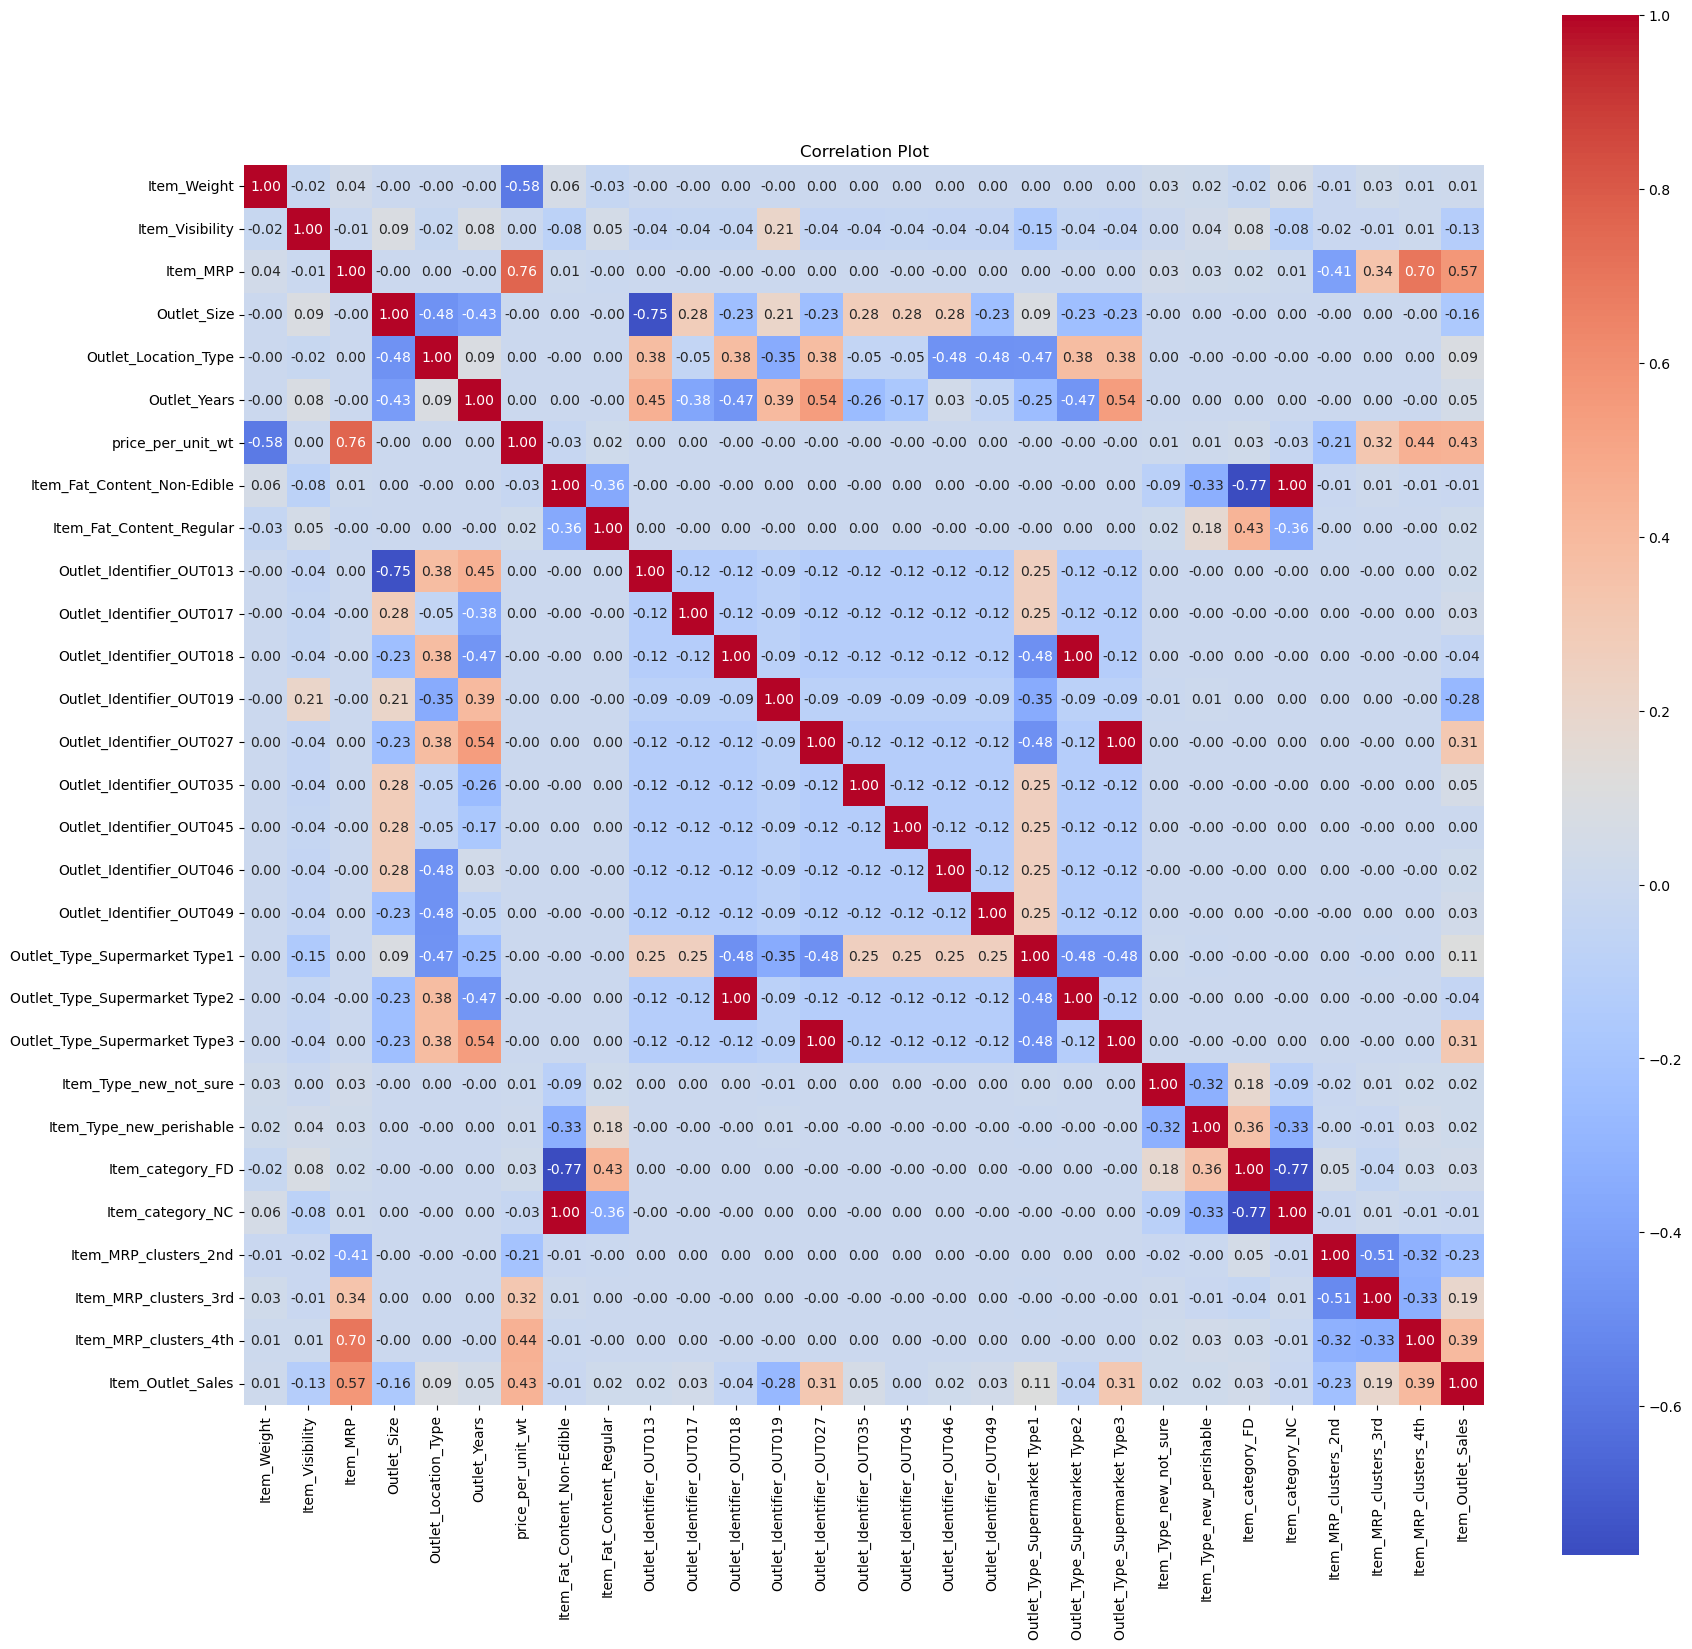

In [781]:
# Calculate the correlation matrix
cor_df = df_scaled.corr(numeric_only = True)

# Create a correlation plot
plt.figure(figsize=(20, 20))
sns.heatmap(cor_df, cmap="coolwarm", annot=True, fmt=".2f", square=True)
plt.title("Correlation Plot")
plt.show()

We observe highly correlated variables like price_per_unit_wt and Item_Weight, price_per_unit_wt and Item_MRP etc. as the former one was created from the latter.

#### Splitting the combined data back to train and test set.

In [784]:
n_train = len(data_train)  

# Splitting into training and test sets
train = df_scaled[:n_train]
test = df_scaled[n_train:]

# Remove 'Item_Outlet_Sales' from the test set since it has only na values
test = test.drop(columns=['Item_Outlet_Sales'])

In [785]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_not_sure,Item_Type_new_perishable,Item_category_FD,Item_category_NC,Item_MRP_clusters_2nd,Item_MRP_clusters_3rd,Item_MRP_clusters_4th,Item_Outlet_Sales
0,-0.751014,-1.114435,1.752511,-0.664115,-1.369286,-0.139681,1.495084,-0.482908,-0.739212,-0.350367,...,-0.349480,-0.351127,-0.466428,1.450524,0.626428,-0.482908,-0.698871,-0.729671,2.217732,3735.1380
1,-1.477653,-1.044385,-1.493696,-0.664115,1.091566,-1.334228,-0.429946,-0.482908,1.352792,-0.350367,...,2.861395,-0.351127,-0.466428,-0.689406,-1.596352,-0.482908,-0.698871,-0.729671,-0.450911,443.4228
2,1.011839,-1.098962,0.009874,-0.664115,-1.369286,-0.139681,-0.441533,-0.482908,-0.739212,-0.350367,...,-0.349480,-0.351127,-0.466428,1.450524,0.626428,-0.482908,-0.698871,1.370481,-0.450911,2097.2700
3,1.377308,-1.075663,0.661838,0.799968,1.091566,-0.020226,-0.195232,-0.482908,1.352792,-0.350367,...,-0.349480,-0.351127,-0.466428,1.450524,0.626428,-0.482908,-0.698871,1.370481,-0.450911,732.3800
4,-0.830557,-1.250959,-1.403623,-2.128198,1.091566,1.293777,-0.886076,2.070787,-0.739212,2.854149,...,-0.349480,-0.351127,-0.466428,-0.689406,-1.596352,2.070787,-0.698871,-0.729671,-0.450911,994.7052


In [786]:
train.shape

(8523, 29)

In [787]:
test.shape

(5681, 28)

In [788]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_not_sure,Item_Type_new_perishable,Item_category_FD,Item_category_NC,Item_MRP_clusters_2nd,Item_MRP_clusters_3rd,Item_MRP_clusters_4th
8523,1.710530,-1.299410,-0.533831,-0.664115,-1.369286,-0.139681,-1.104239,-0.482908,-0.739212,-0.350367,...,0.726841,-0.34948,-0.351127,2.143953,-0.689406,0.626428,-0.482908,1.430879,-0.729671,-0.450911
8524,-0.965996,-0.633707,-0.864708,0.799968,-0.138860,-1.095319,-0.032209,-0.482908,1.352792,-0.350367,...,0.726841,-0.34948,-0.351127,-0.466428,1.450524,0.626428,-0.482908,1.430879,-0.729671,-0.450911
8525,0.388391,0.628711,1.622763,0.799968,1.091566,-0.020226,0.696601,2.070787,-0.739212,-0.350367,...,-1.375817,-0.34948,-0.351127,2.143953,-0.689406,-1.596352,2.070787,-0.698871,-0.729671,2.217732
8526,-1.177753,-1.128748,0.225966,0.799968,-0.138860,-1.095319,1.101783,-0.482908,-0.739212,-0.350367,...,0.726841,-0.34948,-0.351127,2.143953,-0.689406,0.626428,-0.482908,-0.698871,1.370481,-0.450911
8527,0.173409,1.007191,1.501577,-0.664115,1.091566,1.532686,0.760826,-0.482908,1.352792,-0.350367,...,-1.375817,-0.34948,2.847976,-0.466428,1.450524,0.626428,-0.482908,-0.698871,-0.729671,2.217732


## Model Building

### Dependent and Independent Variable

In [791]:
for col in train.iloc[:,0:21]:
    train[col] = train[col].astype('int8')

C:\Users\anuan\AppData\Local\Temp\ipykernel_8776\2766677442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\anuan\AppData\Local\Temp\ipykernel_8776\2766677442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\anuan\AppData\Local\Temp\ipykernel_8776\2766677442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [792]:
train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_not_sure,Item_Type_new_perishable,Item_category_FD,Item_category_NC,Item_MRP_clusters_2nd,Item_MRP_clusters_3rd,Item_MRP_clusters_4th,Item_Outlet_Sales
0,0,-1,1,0,-1,0,1,0,0,0,...,0,0,-0.466428,1.450524,0.626428,-0.482908,-0.698871,-0.729671,2.217732,3735.1380
1,-1,-1,-1,0,1,-1,0,0,1,0,...,2,0,-0.466428,-0.689406,-1.596352,-0.482908,-0.698871,-0.729671,-0.450911,443.4228
2,1,-1,0,0,-1,0,0,0,0,0,...,0,0,-0.466428,1.450524,0.626428,-0.482908,-0.698871,1.370481,-0.450911,2097.2700
3,1,-1,0,0,1,0,0,0,1,0,...,0,0,-0.466428,1.450524,0.626428,-0.482908,-0.698871,1.370481,-0.450911,732.3800
4,0,-1,-1,-2,1,1,0,2,0,2,...,0,0,-0.466428,-0.689406,-1.596352,2.070787,-0.698871,-0.729671,-0.450911,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1,0,1,-2,1,1,1,0,0,2,...,0,0,2.143953,-0.689406,0.626428,-0.482908,-0.698871,-0.729671,2.217732,2778.3834
8519,0,0,0,0,0,0,0,0,1,0,...,0,0,-0.466428,-0.689406,0.626428,-0.482908,1.430879,-0.729671,-0.450911,549.2850
8520,0,0,0,0,0,0,0,2,0,0,...,0,0,-0.466428,-0.689406,-1.596352,2.070787,1.430879,-0.729671,-0.450911,1193.1136
8521,-1,1,0,0,1,-1,0,0,1,0,...,2,0,2.143953,-0.689406,0.626428,-0.482908,1.430879,-0.729671,-0.450911,1845.5976


In [793]:
for col in test.iloc[:,0:21]:
    test[col] = test[col].astype('int8')

In [794]:
test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_not_sure,Item_Type_new_perishable,Item_category_FD,Item_category_NC,Item_MRP_clusters_2nd,Item_MRP_clusters_3rd,Item_MRP_clusters_4th
8523,1,-1,0,0,-1,0,-1,0,0,0,...,0,0,0,2.143953,-0.689406,0.626428,-0.482908,1.430879,-0.729671,-0.450911
8524,0,0,0,0,0,-1,0,0,1,0,...,0,0,0,-0.466428,1.450524,0.626428,-0.482908,1.430879,-0.729671,-0.450911
8525,0,0,1,0,1,0,0,2,0,0,...,-1,0,0,2.143953,-0.689406,-1.596352,2.070787,-0.698871,-0.729671,2.217732
8526,-1,-1,0,0,0,-1,1,0,0,0,...,0,0,0,2.143953,-0.689406,0.626428,-0.482908,-0.698871,1.370481,-0.450911
8527,0,1,1,0,1,1,0,0,1,0,...,-1,0,2,-0.466428,1.450524,0.626428,-0.482908,-0.698871,-0.729671,2.217732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0,-1,0,0,-1,0,0,0,1,0,...,0,0,0,2.143953,-0.689406,0.626428,-0.482908,-0.698871,1.370481,-0.450911
14200,-1,1,0,0,1,-1,1,0,1,0,...,-1,2,0,2.143953,-0.689406,0.626428,-0.482908,-0.698871,1.370481,-0.450911
14201,0,0,0,0,0,0,0,2,0,0,...,0,0,0,-0.466428,-0.689406,-1.596352,2.070787,1.430879,-0.729671,-0.450911
14202,0,0,1,0,0,-1,0,0,1,0,...,0,0,0,-0.466428,-0.689406,0.626428,-0.482908,-0.698871,-0.729671,2.217732


In [795]:
X = train.drop("Item_Outlet_Sales", axis=1)
y = train["Item_Outlet_Sales"]


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64
(8523, 28)


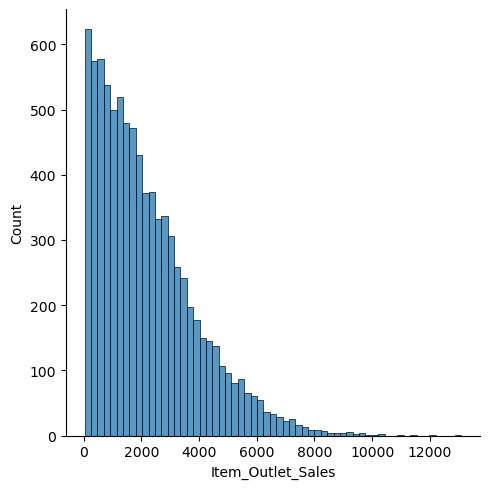

In [796]:
#log Transformation of target Variable
print(y)
print(X.shape)
sns.displot(y)

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: Item_Outlet_Sales, Length: 8523, dtype: float64
(8523, 28)


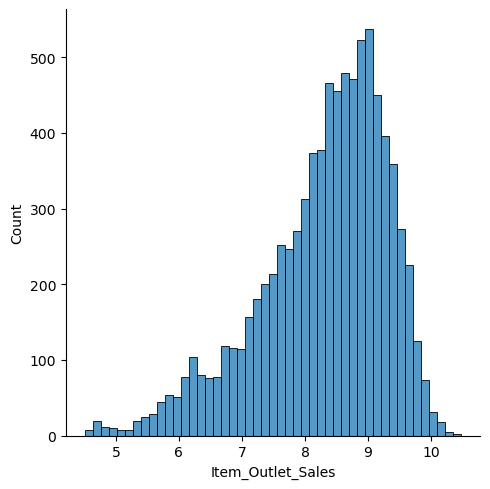

In [797]:
y = np.log(y)
print(y)
print(X.shape)
sns.displot(y+1)

In [798]:
import statsmodels.api as sm
x=sm.add_constant(X)
model=sm.OLS(y,x)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1079.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:35:48   Log-Likelihood:                -6703.5
No. Observations:                8523   AIC:                         1.345e+04
Df Residuals:                    8501   BIC:                         1.361e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             4.4337      0.007    651.632      0.000       4.420       4.447
Item_Weight                       0.0637      0.011      5.598      0.000       0.041       0.086
Item_Visibility                   0.0004      0.008      0.048      0.962      -0.016       0.017
Item_MRP                          0.2244      0.039      5.703      0.000       0.147       0.301
Outlet_Size                      -0.7239      0.005   -145.221      0.000      -0.734      -0.714
Outlet_Location_Type             -0.1053      0.009    -12.259      0.000      -0.122      -0.088
Outlet_Years                     -0.1527      0.004    -41.766      0.000      -0.160      -0.146
price_per_unit_wt                 0.1311      0.015      9.031      0.000       0.103       0.160
Item_Fat_Content_Non-Edible       1.0434      0.004    235.341      0.000       1.035       1.052
Item_Fat_Content_Regular          0.0177      0.013      1.327      0.185      -0.008       0.044
Outlet_Identifier_OUT013          0.7239      0.005    145.221      0.000       0.714       0.734
Outlet_Identifier_OUT017          1.2736      0.008    164.212      0.000       1.258       1.289
Outlet_Identifier_OUT018          0.4110      0.007     56.918      0.000       0.397       0.425
Outlet_Identifier_OUT019         -0.0108      0.007     -1.595      0.111      -0.024       0.002
Outlet_Identifier_OUT027          0.6625      0.007     94.830      0.000       0.649       0.676
Outlet_Identifier_OUT035          1.3607      0.009    157.215      0.000       1.344       1.378
Outlet_Identifier_OUT045          1.3123      0.009    151.559      0.000       1.295       1.329
Outlet_Identifier_OUT046          1.2762      0.008    167.845      0.000       1.261       1.291
Outlet_Identifier_OUT049          1.2967      0.008    170.681      0.000       1.282       1.312
Outlet_Type_Supermarket Type1    -0.8120      0.010    -80.649      0.000      -0.832      -0.792
Outlet_Type_Supermarket Type2     0.4110      0.007     56.918      0.000       0.397       0.425
Outlet_Type_Supermarket Type3     0.6625      0.007     94.830      0.000       0.649       0.676
Item_Type_new_not_sure            0.0058      0.006      0.889      0.374      -0.007       0.018
Item_Type_new_perishable          0.0113      0.007      1.656      0.098      -0.002       0.025
Item_category_FD                 -0.0007      0.010     -0.073      0.942      -0.020       0.018
Item_category_NC                 -0.8088      0.006   -134.370      0.000      -0.821      -0.797
Item_MRP_clusters_2nd             0.2187      0.019     11.294      0.000       0.181       0.257
Item_MRP_clusters_3rd             0.4342      0.021     20.460      0.000       0.393       0.476
Item_MRP_clusters_4th             0.3683     

## Checking OLS assumptions after log transformation

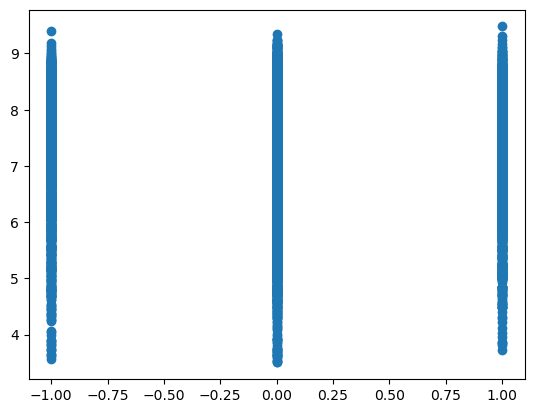

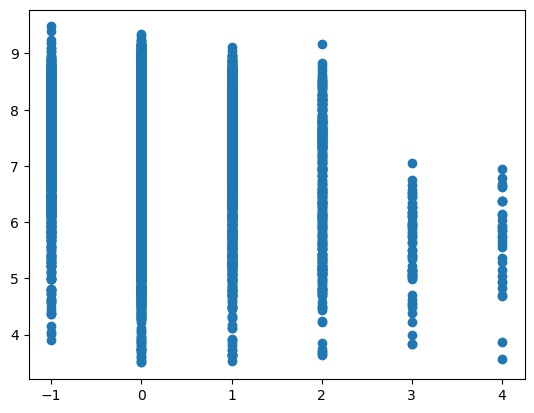

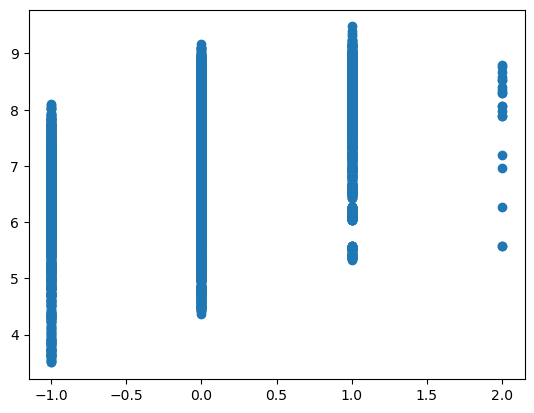

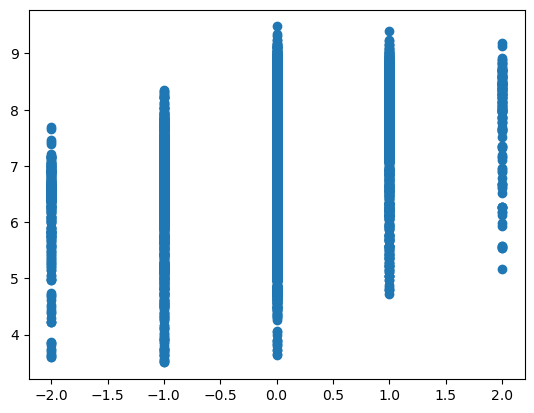

In [800]:
col1 = ['Item_Weight','Item_Visibility','Item_MRP','price_per_unit_wt']
for col in col1:
    plt.scatter(X[col],y)
    plt.show()

In [801]:
#checking error mean assumption
residuals=result.resid
np.mean(residuals)

-1.19995270059404e-14

Extremely close to zero.

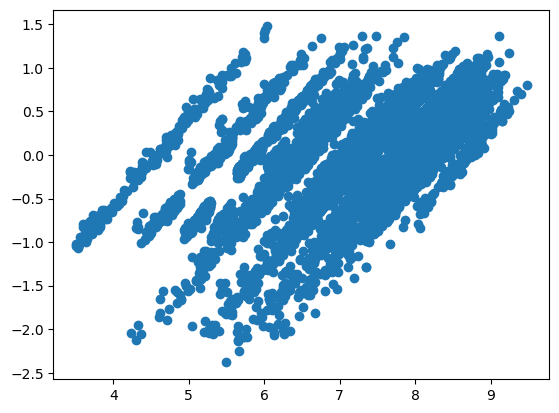

In [803]:
#Homoscedasticity
plt.scatter(y,residuals)

Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic

In [805]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test_val = het_goldfeldquandt(residuals, X)
lzip(name, test_val)

[('F statistic', 0.9489173496547582), ('p-value', 0.9560714547688217)]

Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject the null hypothesis that error terms are homoscedastic. Good.

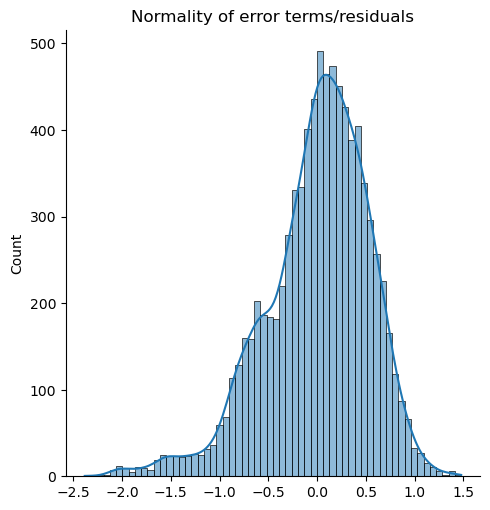

In [807]:
#Normality of error terms/residulas
p = sns.displot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals') 

The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

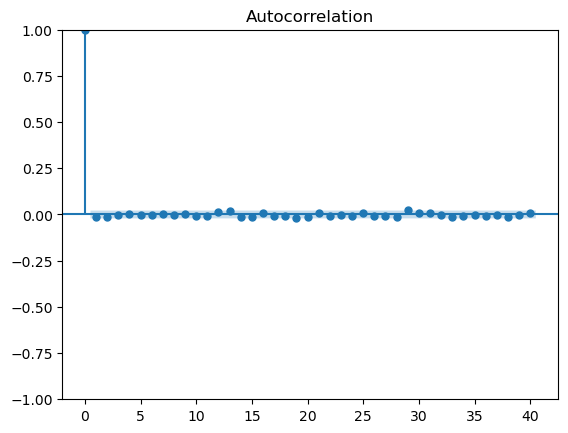

In [809]:
#No autocorrelation of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

No signs of autocorrelation

In [811]:
#Multicollinearity
corr_mat = df_scaled.corr()
print(corr_mat)

                               Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                       1.000000        -0.022620  0.035751   
Item_Visibility                  -0.022620         1.000000 -0.007209   
Item_MRP                          0.035751        -0.007209  1.000000   
Outlet_Size                      -0.000512         0.088863 -0.001052   
Outlet_Location_Type             -0.001719        -0.020218  0.000838   
Outlet_Years                     -0.000247         0.082540 -0.000141   
price_per_unit_wt                -0.581025         0.001605  0.758688   
Item_Fat_Content_Non-Edible       0.057474        -0.082983  0.009151   
Item_Fat_Content_Regular         -0.033737         0.051343 -0.004019   
Outlet_Identifier_OUT013         -0.000395        -0.038481  0.000697   
Outlet_Identifier_OUT017         -0.000848        -0.035285 -0.000034   
Outlet_Identifier_OUT018          0.000771        -0.037427 -0.000023   
Outlet_Identifier_OUT019         -0.000151         

As seen earlier,Multicollinearity is present

In [813]:
from sklearn.model_selection import train_test_split
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [814]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_not_sure,Item_Type_new_perishable,Item_category_FD,Item_category_NC,Item_MRP_clusters_2nd,Item_MRP_clusters_3rd,Item_MRP_clusters_4th
1544,-1,0,0,-2,1,1,1,0,1,2,...,0,0,0,-0.466428,-0.689406,0.626428,-0.482908,1.430879,-0.729671,-0.450911
7932,0,0,0,0,-1,1,0,2,0,0,...,-1,0,0,-0.466428,-0.689406,-1.596352,2.070787,1.430879,-0.729671,-0.450911
4654,-1,-1,0,0,-1,0,1,0,0,0,...,0,0,0,2.143953,-0.689406,0.626428,-0.482908,-0.698871,1.370481,-0.450911
4770,0,0,0,0,1,0,0,2,0,0,...,-1,0,0,-0.466428,-0.689406,-1.596352,2.070787,1.430879,-0.729671,-0.450911
6283,0,0,0,0,0,-1,0,0,1,0,...,0,0,0,-0.466428,-0.689406,0.626428,-0.482908,1.430879,-0.729671,-0.450911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,1,0,0,0,1,-1,0,0,0,0,...,-1,2,0,2.143953,-0.689406,0.626428,-0.482908,-0.698871,1.370481,-0.450911
7763,0,0,-1,0,-1,1,-1,0,0,0,...,-1,0,0,-0.466428,-0.689406,-1.596352,-0.482908,-0.698871,-0.729671,-0.450911
5218,-1,-1,-1,-2,1,1,0,0,1,2,...,0,0,0,-0.466428,-0.689406,-1.596352,-0.482908,-0.698871,-0.729671,-0.450911
1346,0,0,0,0,1,-1,0,0,0,0,...,-1,2,0,-0.466428,-0.689406,0.626428,-0.482908,1.430879,-0.729671,-0.450911


In [815]:
X_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Years', 'price_per_unit_wt',
       'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_new_not_sure', 'Item_Type_new_perishable',
       'Item_category_FD', 'Item_category_NC', 'Item_MRP_clusters_2nd',
       'Item_MRP_clusters_3rd', 'Item_MRP_clusters_4th'],
      dtype='object')

### Linear Regression

Training and testing on train dataset

In [818]:
"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = df_scaled.drop("Item_Outlet_Sales", axis=1)
y = df_scaled["Item_Outlet_Sales"]

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE in original sales units:", rmse) """


'\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\nimport numpy as np\n\nX = df_scaled.drop("Item_Outlet_Sales", axis=1)\ny = df_scaled["Item_Outlet_Sales"]\n\nlr = LinearRegression()\nlr.fit(X_train, y_train)\ny_pred = lr.predict(X_test)\n\nrmse = np.sqrt(mean_squared_error(y_test, y_pred))\nprint("RMSE in original sales units:", rmse) '

In [980]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [982]:
y_pred = lreg.predict(X_test)

In [984]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [986]:
print("R-squared value of Linear Regression Model is ",(r2_score(y_test, y_pred)))
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

R-squared value of Linear Regression Model is  0.5475871962719692
RMSE of Linear Regression Model is  1168.9930527714048


In [988]:
pred_table = pd.DataFrame({'Actual':(y_test),'Predicted':(y_pred)})
pred_table.head()

,Actual,Predicted
4532,479.3760,1016.0
186,657.8104,676.0
7557,952.0940,2664.0
6308,691.1004,1868.0
7297,4537.4270,4214.0


Making predictions on test data

In [991]:
test_pred1 = lreg.predict(test)

In [995]:
df_pred1 = pd.DataFrame()
df_pred1['Item_Identifier'] = data_test['Item_Identifier']
df_pred1['Outlet_Identifier'] = data_test['Outlet_Identifier']
df_pred1['Item_Outlet_Sales'] = test_pred1
df_pred1.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1710.0
1,FDW14,OUT017,1934.0
2,NCN55,OUT010,2032.0
3,FDQ58,OUT017,2892.0
4,FDY38,OUT027,5186.0


In [997]:
df_pred1.to_csv('lr_pred', index=False,header=True)

### Lasso Regression

In [1000]:
from sklearn.linear_model import Lasso

# Create a range of alpha values to tune
alphas = np.arange(0.001, 0.1, 0.0002)

# Create a Lasso model
lasso = Lasso(max_iter = 500,  tol=0.1)

# Define hyperparameter grid for GridSearchCV
param_grid = {'alpha': alphas}

# Create GridSearchCV with 5-fold cross-validation
lasso_linear_reg_mod = GridSearchCV(lasso, param_grid, cv=5, n_jobs=-1)

# Fit the model to your training data
lasso_linear_reg_mod.fit(X_train, y_train)

# Get the best hyperparameters and the trained Lasso model
best_alpha = lasso_linear_reg_mod.best_params_['alpha']
print(f"Best alpha: {best_alpha}")
best_lasso_model = lasso_linear_reg_mod.best_estimator_

# Use the best model to make predictions
predictions = best_lasso_model.predict(X_test)

Best alpha: 0.09220000000000005


In [1004]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_lasso_model, X_train, y_train, cv=5)
print("Cross-validated performance scores:")
print(scores)

Cross-validated performance scores:
[0.55737613 0.52671245 0.53384988 0.52368315 0.55081428]


In [1006]:
print("R-squared value of Lasso Regression Model is ",(r2_score(y_test, predictions)))
from math import sqrt
print("RMSE of Lasso Regression Model is ",sqrt(mean_squared_error(y_test, predictions)))

R-squared value of Lasso Regression Model is  0.5520232759032231
RMSE of Lasso Regression Model is  1163.247723517712


### Ridge Regression

In [1009]:
from sklearn.linear_model import Ridge
# Create a range of alpha values to tune
alphas = np.arange(0.001, 0.1, 0.0002)

# Create a Ridge model
ridge = Ridge(max_iter = 500,  tol=0.1)

# Define hyperparameter grid for GridSearchCV
param_grid = {'alpha': alphas}

# Create GridSearchCV with 5-fold cross-validation
ridge_linear_reg_mod = GridSearchCV(lasso, param_grid, cv=5, n_jobs=-1)

# Fit the model to your training data
ridge_linear_reg_mod.fit(X_train, y_train)

# Get the best hyperparameters and the trained Ridge model
best_alpha = ridge_linear_reg_mod.best_params_['alpha']
print(f"Best alpha: {best_alpha}")
best_ridge_model = ridge_linear_reg_mod.best_estimator_

# Use the best model to make predictions
predictions = best_ridge_model.predict(X_test)

Best alpha: 0.09220000000000005


In [1010]:
scores = cross_val_score(best_ridge_model, X_train, y_train, cv=5)
print("Cross-validated performance scores:")
print(scores)

Cross-validated performance scores:
[0.55737613 0.52671245 0.53384988 0.52368315 0.55081428]


In [1013]:
print("R-squared value of Ridge Regression Model is ",(r2_score(y_test, predictions)))
from math import sqrt
print("RMSE of Ridge Regression Model is ",sqrt(mean_squared_error(y_test, predictions)))

R-squared value of Ridge Regression Model is  0.5520232759032231
RMSE of Ridge Regression Model is  1163.247723517712


Making predictions on test dataset

In [1016]:
test_pred4 = best_ridge_model.predict(test)

In [1020]:
df_pred4 = pd.DataFrame()
df_pred4['Item_Identifier'] = data_test['Item_Identifier']
df_pred4['Outlet_Identifier'] = data_test['Outlet_Identifier']
df_pred4['Item_Outlet_Sales'] = test_pred4
df_pred4.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1677.684925
1,FDW14,OUT017,1904.490995
2,NCN55,OUT010,1774.965637
3,FDQ58,OUT017,2856.293565
4,FDY38,OUT027,5146.178777


In [1024]:
df_pred4.to_csv('ridge_pred', index=False,header=True)



### Random Forest Regressor

In [1027]:
X = train.drop("Item_Outlet_Sales", axis=1)
y = train["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [1029]:
from sklearn.ensemble import RandomForestRegressor


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [400],
    'max_features': list(range(3, 11)),
    'min_samples_split': [10, 15, 20],
    }

# Create a Random Forest regression model
rf_model = RandomForestRegressor()

# Create a grid search using cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_rf_model = grid_search.best_estimator_
best_max_features = grid_search.best_params_['max_features']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# cross-validated performance scores
scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)

# best hyperparameters
print(f"Best max_features: {best_max_features}")
print(f"Best min_samples_split: {best_min_samples_split}")

#cross-validated performance scores
print("Cross-validated performance scores:")
print(scores)

Best max_features: 5
Best min_samples_split: 20
Cross-validated performance scores:
[0.58229485 0.55328345 0.55691165 0.53598552 0.57487295]


In [1031]:
rf_model_tuned =  RandomForestRegressor(n_estimators=400, max_features =6, min_samples_split=20)
rf_model_tuned.fit(X_train,y_train)
pred_rf = rf_model_tuned.predict(X_test)

In [1033]:
feature_importances = pd.DataFrame({'values' : rf_model_tuned.feature_importances_, 'feature names' : X_train.columns})
#feature_importances.sort_values(ascending=True, inplace=True)
feature_importances


,values,feature names
0,0.017084,Item_Weight
1,0.024929,Item_Visibility
2,0.186191,Item_MRP
3,0.006023,Outlet_Size
4,0.025812,Outlet_Location_Type
5,0.040929,Outlet_Years
6,0.082219,price_per_unit_wt
7,0.003111,Item_Fat_Content_Non-Edible
8,0.007942,Item_Fat_Content_Regular
9,0.005390,Outlet_Identifier_OUT013


In [1035]:
print("R-squared value of Random Forest Regressor Model is ",(r2_score(y_test, pred_rf)))
from math import sqrt
print("RMSE of Random Forest Regressor Model is ",sqrt(mean_squared_error(y_test, pred_rf)))

R-squared value of Random Forest Regressor Model is  0.5851931072986822
RMSE of Random Forest Regressor Model is  1119.3540337610457


Making predictions on test dataset

In [1038]:
test_pred2 = rf_model_tuned.predict(test)

In [1040]:
df_pred2 = pd.DataFrame()
df_pred2['Item_Identifier'] = data_test['Item_Identifier']
df_pred2['Outlet_Identifier'] = data_test['Outlet_Identifier']
df_pred2['Item_Outlet_Sales'] = (test_pred2)
df_pred2.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1530.537153
1,FDW14,OUT017,1785.788691
2,NCN55,OUT010,1030.351085
3,FDQ58,OUT017,2516.282190
4,FDY38,OUT027,5587.651072


In [1042]:
df_pred2.to_csv('rf_pred', index=False,header=True)

### XGBoost Regressor

In [1045]:
import xgboost as xgb

# Define the parameter grid for hyperparameter tuning
params_list = {
    'eta': 0.01,
    'gamma': 1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.5
}

# Create DMatrix objects
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)
# Perform cross-validation with early stopping
cv_results = xgb.cv(
    params=params_list,
    dtrain=dtrain,
    num_boost_round=1000,
    nfold=5,  # Number of folds for cross-validation
    metrics='rmse',  # Evaluation metric (root mean squared error)
    early_stopping_rounds=30,
    verbose_eval=10,  # Print evaluation results every 10 rounds
    maximize=False  # Set to False if minimizing the evaluation metric
)

[0]	train-rmse:1682.76715+18.87337	test-rmse:1681.59116+75.27830
[10]	train-rmse:1607.32720+17.08991	test-rmse:1607.74465+72.30555
[20]	train-rmse:1542.49915+15.39747	test-rmse:1544.48229+69.53543
[30]	train-rmse:1480.69163+13.79935	test-rmse:1484.22737+66.70530
[40]	train-rmse:1436.21065+12.87802	test-rmse:1441.38769+64.13012
[50]	train-rmse:1396.32207+11.92260	test-rmse:1403.06061+62.45753
[60]	train-rmse:1357.10640+11.38661	test-rmse:1365.83465+60.19517
[70]	train-rmse:1319.89028+10.47598	test-rmse:1330.32471+58.22858
[80]	train-rmse:1290.33518+9.85080	test-rmse:1302.37102+56.48967
[90]	train-rmse:1262.08523+9.55109	test-rmse:1275.92697+54.65055
[100]	train-rmse:1237.47176+9.12033	test-rmse:1252.93704+52.88779
[110]	train-rmse:1216.31158+8.69039	test-rmse:1233.30176+51.46523
[120]	train-rmse:1199.64003+8.57369	test-rmse:1218.38569+50.19957
[130]	train-rmse:1181.11388+8.47354	test-rmse:1201.36857+48.76183
[140]	train-rmse:1167.47347+8.21658	test-rmse:1189.46293+47.67269
[150]	train-r

In [1047]:
# Train the XGBoost model
xgb_model = xgb.train(
    params=params_list,
    dtrain=dtrain,
    num_boost_round=399
)

In [1049]:
y_test_pred = xgb_model.predict(dtest)

In [1051]:
print("R-squared value of XGBoost Regressor Model is ",(r2_score(y_test, y_test_pred)))
from math import sqrt
print("RMSE of XGBoost Regressor Model is ",sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared value of XGBoost Regressor Model is  0.5867047919986558
RMSE of XGBoost Regressor Model is  1117.312535830937


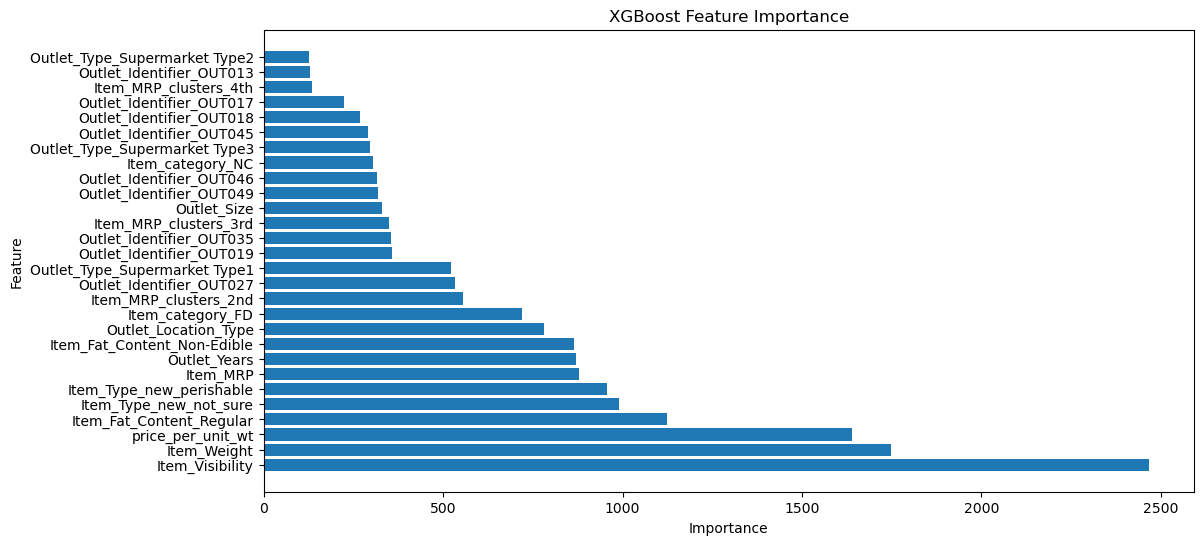

In [1053]:
#Feature Importance
feature_names = list(X_train.columns)
feature_imp = xgb_model.get_fscore()
feature_imp_df = pd.DataFrame(list(feature_imp.items()), columns=['Feature', 'Importance'])
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

Making Prediction on test dataset

In [1056]:
dtest1 = xgb.DMatrix(data=test)
xgb_pred = xgb_model.predict(dtest1)

In [1058]:
df_pred3 = pd.DataFrame()
df_pred3['Item_Identifier'] = data_test['Item_Identifier']
df_pred3['Outlet_Identifier'] = data_test['Outlet_Identifier']
df_pred3['Item_Outlet_Sales'] = xgb_pred
df_pred3.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1546.367554
1,FDW14,OUT017,1844.087036
2,NCN55,OUT010,1049.517822
3,FDQ58,OUT017,2715.140381
4,FDY38,OUT027,5344.928223


In [1060]:
df_pred3.to_csv('xgb_pred', index=False,header=True)

#Model Comparison

In [1065]:
import pandas as pd

# Create a DataFrame with model comparison
model_comparison = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Lasso Regression",
        "Ridge Regression",
        "Random Forest Regressor",
        "XGBoost Regressor"
    ],
    "R² Score": [
        0.5476,
        0.5520,
        0.5520,
        0.5852,
        0.5867
    ],
    "RMSE": [
        1168.99,
        1163.25,
        1163.25,
        1119.35,
        1117.31
    ]
})

# Sort by RMSE (ascending)
model_comparison = model_comparison.sort_values(by="RMSE")

# Display the table
model_comparison.reset_index(drop=True, inplace=True)
model_comparison


,Model,R² Score,RMSE
0,XGBoost Regressor,0.5867,1117.31
1,Random Forest Regressor,0.5852,1119.35
2,Lasso Regression,0.5520,1163.25
3,Ridge Regression,0.5520,1163.25
4,Linear Regression,0.5476,1168.99


# Conclusion :
The model that is performing best is XGBoost Regressor followed by Random Forest Regressor.
XGBoost slightly edges out Random Forest in both R² and RMSE — it is the best-performing model so far.
Regularized linear models (Lasso, Ridge) show small improvements over plain Linear Regression but plateau quickly.